In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
single_train = pd.read_csv("../final_dataset/single/single_train.csv")
single_valid = pd.read_csv("../final_dataset/single/single_valid.csv")
single_test = pd.read_csv("../final_dataset/single/single_test.csv")

In [3]:
feature_columns = single_train.columns[1:-1]

X_single_train = single_train[feature_columns].values
Y_single_train = single_train['Label'].values

X_single_valid = single_valid[feature_columns].values
Y_single_valid = single_valid['Label'].values

X_single_test = single_test[feature_columns].values
Y_single_test = single_test['Label'].values

In [4]:
single_scaler = StandardScaler()

X_single_train = single_scaler.fit_transform(X_single_train)
X_single_valid = single_scaler.transform(X_single_valid)
X_single_test = single_scaler.transform(X_single_test)

Y_single_train = Y_single_train.astype(int)
Y_single_valid = Y_single_valid.astype(int)
Y_single_test = Y_single_test.astype(int)

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

def print_classification_result(result_df, model_name, data_type, y_true, y_pred, y_pred_prob):
    # 정확도
    accuracy = accuracy_score(y_true, y_pred)
    
    # 정밀도 (단일 스칼라 값)
    precision = precision_score(y_true, y_pred, average='weighted')  
    
    # 재현율 (단일 스칼라 값)
    recall = recall_score(y_true, y_pred, average='weighted')  
    
    # F1 점수 (단일 스칼라 값)
    f1 = f1_score(y_true, y_pred, average='weighted')  
    
    # AUC Score 계산
    auc_score = roc_auc_score(y_true, y_pred_prob[:, 1])
    
    # PR Score 계산
    pr_score = average_precision_score(y_true, y_pred_prob[:, 1])
    
    # 결과 저장 (각 지표의 단일 값 저장)
    result_df.loc[len(result_df)] = [
        model_name,
        data_type,
        accuracy,
        precision,
        recall,
        f1,
        auc_score,
        pr_score
    ]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

   

model = Sequential()
model.add(LSTM(100, input_shape=(X_single_train.shape[1], 1), return_sequences=True))  # 첫 번째 LSTM 레이어
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))  # 두 번째 LSTM 레이어
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

 

2024-09-20 22:04:38.849603: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-20 22:04:38.915664: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 22:04:38.915718: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 22:04:38.915728: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 22:04:38.925136: I tensorflow/core/platform/cpu_feature_g

In [7]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_single_train, Y_single_train, epochs=50, batch_size=32, validation_data=(X_single_valid, Y_single_valid)) 

Epoch 1/50


2024-09-20 22:04:48.297660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-09-20 22:04:50.751313: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f326810a250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-20 22:04:50.751360: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-09-20 22:04:50.758238: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-20 22:04:51.052814: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/91 [==============================] - 10s 30ms/step - loss: 0.5633 - accuracy: 0.7137 - val_loss: 0.5905 - val_accuracy: 0.7134
Epoch 2/50
91/91 [==============================] - 1s 12ms/step - loss: 0.5410 - accuracy: 0.7220 - val_loss: 0.5705 - val_accuracy: 0.7275
Epoch 3/50
91/91 [==============================] - 1s 11ms/step - loss: 0.5304 - accuracy: 0.7258 - val_loss: 0.5427 - val_accuracy: 0.7177
Epoch 4/50
91/91 [==============================] - 1s 12ms/step - loss: 0.5032 - accuracy: 0.7416 - val_loss: 0.5068 - val_accuracy: 0.7348
Epoch 5/50
91/91 [==============================] - 1s 11ms/step - loss: 0.4819 - accuracy: 0.7636 - val_loss: 0.5091 - val_accuracy: 0.7838
Epoch 6/50
91/91 [==============================] - 1s 12ms/step - loss: 0.4355 - accuracy: 0.7928 - val_loss: 0.4511 - val_accuracy: 0.7851
Epoch 7/50
91/91 [==============================] - 1s 12ms/step - loss: 0.3969 - accuracy: 0.8117 - val_loss: 0.3982 - val_accuracy: 0.8212
Epoch 8/50
91/91 [=====

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

# 예측
y_pred = model.predict(X_single_train)

# 예측 확률을 이진 레이블로 변환
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(Y_single_train, y_pred_binary)

# Weighted Precision
weighted_precision = precision_score(Y_single_train, y_pred_binary)

# Weighted Recall
weighted_recall = recall_score(Y_single_train, y_pred_binary)

# Weighted F1 Score
weighted_f1 = f1_score(Y_single_train, y_pred_binary)

# AUC Score
auc_score = roc_auc_score(Y_single_train, y_pred)

# PR Curve의 평균 정밀도 점수 계산
pr_score = average_precision_score(Y_single_train, y_pred)

print("---------------------------valid--------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {weighted_precision}')
print(f'Recall: {weighted_recall}')
print(f'F1 Score: {weighted_f1}')
print(f'AUC Score: {auc_score}')
print(f'PR Score: {pr_score}')


91/91 [==============================] - 2s 4ms/step
---------------------------valid--------------------------
Accuracy: 0.9666666666666667
Precision: 0.9592476489028213
Recall: 0.9645390070921985
F1 Score: 0.9618860510805501
AUC Score: 0.9964920772809062
PR Score: 0.995728777833842


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

# 예측
y_pred = model.predict(X_single_valid)

# 예측 확률을 이진 레이블로 변환
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(Y_single_valid, y_pred_binary)

# Weighted Precision
weighted_precision = precision_score(Y_single_valid, y_pred_binary)

# Weighted Recall
weighted_recall = recall_score(Y_single_valid, y_pred_binary)

# Weighted F1 Score
weighted_f1 = f1_score(Y_single_valid, y_pred_binary)

# AUC Score
auc_score = roc_auc_score(Y_single_valid, y_pred)

# PR Curve의 평균 정밀도 점수 계산
pr_score = average_precision_score(Y_single_valid, y_pred)

print("---------------------------valid--------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {weighted_precision}')
print(f'Recall: {weighted_recall}')
print(f'F1 Score: {weighted_f1}')
print(f'AUC Score: {auc_score}')
print(f'PR Score: {pr_score}')


52/52 [==============================] - 0s 4ms/step
---------------------------valid--------------------------
Accuracy: 0.8977342314758114
Precision: 0.8537271448663853
Recall: 0.9059701492537313
F1 Score: 0.8790731354091238
AUC Score: 0.963878427178748
PR Score: 0.9489527893153547


In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# 예측
y_pred = model.predict(X_single_test)

# 예측 확률을 이진 레이블로 변환
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(Y_single_test, y_pred_binary)

# Weighted Precision
weighted_precision = precision_score(Y_single_test, y_pred_binary)

# Weighted Recall
weighted_recall = recall_score(Y_single_test, y_pred_binary)

# Weighted F1 Score
weighted_f1 = f1_score(Y_single_test, y_pred_binary)

# AUC Score
auc_score = roc_auc_score(Y_single_test, y_pred)

# PR Curve의 평균 정밀도 점수 계산
pr_score = average_precision_score(Y_single_test, y_pred)

print("---------------------------valid--------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {weighted_precision}')
print(f'Recall: {weighted_recall}')
print(f'F1 Score: {weighted_f1}')
print(f'AUC Score: {auc_score}')
print(f'PR Score: {pr_score}')


61/61 [==============================] - 0s 4ms/step
---------------------------valid--------------------------
Accuracy: 0.7981462409886715
Precision: 0.7790055248618785
Recall: 0.7859531772575251
F1 Score: 0.7824639289678136
AUC Score: 0.8405349036927985
PR Score: 0.7056048869236828


In [38]:
# 혼동 행렬 시각화를 위한 함수 정의
def plot_confusion_matrix(model_name, true_labels, predictions):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

61/61 [==============================] - 0s 3ms/step


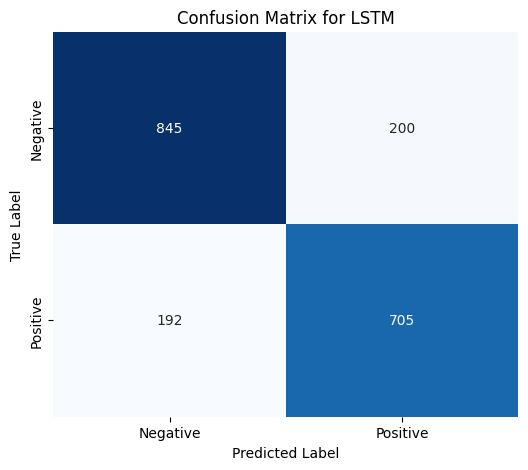

In [41]:
# 테스트 데이터에 대한 예측
test_pred_prob = model.predict(X_single_test)  # 확률값 반환
    
# 확률을 클래스 레이블로 변환 (0.5 임계값 사용)
test_pred = (test_pred_prob >= 0.5).astype(int)

# 혼동 행렬 시각화
plot_confusion_matrix("LSTM", Y_single_test, test_pred)

In [11]:
lstm_pred_prob = model.predict(X_single_test)
np.save('../ml_models/pred_prob/lstm_pred_prob_single.npy', lstm_pred_prob)  # .npy 파일로 저장

61/61 [==============================] - 0s 4ms/step


In [12]:
test_1 = pd.read_csv("../final_dataset/each_test/single/A_S_11.csv")
test_2 = pd.read_csv("../final_dataset/each_test/single/B_S_11.csv")
test_3 = pd.read_csv("../final_dataset/each_test/single/C_S_11.csv")
test_4 = pd.read_csv("../final_dataset/each_test/single/D_S_11.csv")
test_5 = pd.read_csv("../final_dataset/each_test/single/E_S_11.csv")
test_6 = pd.read_csv("../final_dataset/each_test/single/F_S_11.csv")
test_7 = pd.read_csv("../final_dataset/each_test/single/G_S_11.csv")
test_8 = pd.read_csv("../final_dataset/each_test/single/H_S_11.csv")
test_9 = pd.read_csv("../final_dataset/each_test/single/I_S_11.csv")
test_10 = pd.read_csv("../final_dataset/each_test/single/J_S_11.csv")

In [13]:
# feature_columns 정의
feature_columns = test_1.columns[1:-1]  # 모든 test 파일에 동일한 컬럼 구조라고 가정

# 각 test 데이터에 대해 feature와 label 추출
X_test_1 = test_1[feature_columns].values
Y_test_1 = test_1['Label'].values

X_test_2 = test_2[feature_columns].values
Y_test_2 = test_2['Label'].values

X_test_3 = test_3[feature_columns].values
Y_test_3 = test_3['Label'].values

X_test_4 = test_4[feature_columns].values
Y_test_4 = test_4['Label'].values

X_test_5 = test_5[feature_columns].values
Y_test_5 = test_5['Label'].values

X_test_6 = test_6[feature_columns].values
Y_test_6 = test_6['Label'].values

X_test_7 = test_7[feature_columns].values
Y_test_7 = test_7['Label'].values

X_test_8 = test_8[feature_columns].values
Y_test_8 = test_8['Label'].values

X_test_9 = test_9[feature_columns].values
Y_test_9 = test_9['Label'].values

X_test_10 = test_10[feature_columns].values
Y_test_10 = test_10['Label'].values

In [14]:
# Scaler 적용 및 데이터 형 변환을 처리하는 함수 정의
def process_test_data(X_test, Y_test, scaler):
    # 데이터 스케일링
    X_test_scaled = scaler.transform(X_test)
    
    # int 타입으로 변환
    Y_test = Y_test.astype(int)
    
    return X_test_scaled, Y_test


In [15]:
# X_single_train, X_single_valid, X_single_test의 스케일러로 test 데이터 변환
X_test_1, Y_test_1 = process_test_data(X_test_1, Y_test_1, single_scaler)
X_test_2, Y_test_2 = process_test_data(X_test_2, Y_test_2, single_scaler)
X_test_3, Y_test_3 = process_test_data(X_test_3, Y_test_3, single_scaler)
X_test_4, Y_test_4 = process_test_data(X_test_4, Y_test_4, single_scaler)
X_test_5, Y_test_5 = process_test_data(X_test_5, Y_test_5, single_scaler)
X_test_6, Y_test_6 = process_test_data(X_test_6, Y_test_6, single_scaler)
X_test_7, Y_test_7 = process_test_data(X_test_7, Y_test_7, single_scaler)
X_test_8, Y_test_8 = process_test_data(X_test_8, Y_test_8, single_scaler)
X_test_9, Y_test_9 = process_test_data(X_test_9, Y_test_9, single_scaler)
X_test_10, Y_test_10 = process_test_data(X_test_10, Y_test_10, single_scaler)

In [16]:
import os

# 모델을 사용하여 예측 및 점프수 계산을 반복적으로 수행하는 함수
def process_and_visualize(test_data, Y_test, model, model_name, test_name, output_dir):
    
    # 테스트 데이터에 대한 예측
    predictions = model.predict(test_data)
    
    # 이동 평균을 계산하여 예측값 부드럽게 만들기
    smoothed_predictions = np.convolve(predictions.squeeze(), np.ones(5)/5, mode='same')
    
    # 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
    binary_predictions = (smoothed_predictions > 0.5).astype(int)
    
    # 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
    jump_count = np.sum(np.diff(binary_predictions.flatten()) > 0)
    
    # 예측 결과 시각화
    plt.plot(Y_test, label='Actual')
    plt.plot(binary_predictions.flatten(), label='Predicted')
    plt.title(f'Actual vs Predicted for {test_name} player using {model_name}')  
    plt.xlabel('Data Point')
    plt.ylabel('Label')
    plt.legend()
    plt.savefig(os.path.join(output_dir, f'{model_name}_predictions_{test_name}.png'))
    plt.close()  # 현재 플롯 닫기



In [17]:
test_data_list = [
    (X_test_1, Y_test_1, "A"),
    (X_test_2, Y_test_2, "B"),
    (X_test_3, Y_test_3, "C"),
    (X_test_4, Y_test_4, "D"),
    (X_test_5, Y_test_5, "E"),
    (X_test_6, Y_test_6, "F"),
    (X_test_7, Y_test_7, "G"),
    (X_test_8, Y_test_8, "H"),
    (X_test_9, Y_test_9, "I"),
    (X_test_10, Y_test_10, "J")
]

In [18]:
# 결과를 저장할 디렉토리 생성
output_dir = '../single_model_predictions'

  
# 각 테스트 데이터에 대해 process_and_visualize 호출
for test_data, Y_test, test_name in test_data_list:
    # 예측 결과 시각화 및 이미지로 저장
    process_and_visualize(test_data, Y_test, model, "LSTM", test_name, output_dir)
        
        

6/6 [==============================] - 0s 4ms/step


In [19]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# X_single_train을 3D에서 2D로 변환
X_single_test_reshaped = X_single_test.reshape(X_single_test.shape[0], -1)  # (samples, features)

# KMeans를 사용하여 배경 데이터 샘플링
background_samples = shap.kmeans(X_single_test_reshaped, k=10)  # K=100으로 샘플 수를 줄임

# SHAP 설명자 생성
explainer = shap.KernelExplainer(model.predict, background_samples)

# X_single_test를 3D에서 2D로 변환
X_single_test_reshaped = X_single_test.reshape(X_single_test.shape[0], -1)  # (samples, features)

# SHAP 값 계산
shap_values = explainer.shap_values(X_single_test_reshaped)


/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1/1 [==============================] - 0s 77ms/step


  0%|          | 0/1942 [00:00<?, ?it/s]

657/657 [==============================] - 3s 4ms/step


  0%|          | 1/1942 [00:03<2:03:41,  3.82s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 2/1942 [00:09<2:46:35,  5.15s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 3/1942 [00:14<2:31:15,  4.68s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 4/1942 [00:17<2:21:23,  4.38s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 5/1942 [00:24<2:41:12,  4.99s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 6/1942 [00:28<2:30:43,  4.67s/it]

657/657 [==============================] - 3s 5ms/step


  0%|          | 7/1942 [00:34<2:44:59,  5.12s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 8/1942 [00:40<2:53:02,  5.37s/it]

657/657 [==============================] - 3s 4ms/step


  0%|          | 9/1942 [00:43<2:38:03,  4.91s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 10/1942 [00:49<2:48:24,  5.23s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 11/1942 [00:53<2:34:43,  4.81s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 12/1942 [00:59<2:44:33,  5.12s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 13/1942 [01:05<2:50:04,  5.29s/it]

657/657 [==============================] - 2s 3ms/step


  1%|          | 14/1942 [01:08<2:31:22,  4.71s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 15/1942 [01:12<2:24:45,  4.51s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 16/1942 [01:16<2:14:50,  4.20s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 17/1942 [01:21<2:29:41,  4.67s/it]

657/657 [==============================] - 2s 3ms/step


  1%|          | 18/1942 [01:24<2:13:51,  4.17s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 19/1942 [01:30<2:31:16,  4.72s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 20/1942 [01:36<2:42:07,  5.06s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 21/1942 [01:42<2:49:13,  5.29s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 22/1942 [01:48<2:54:20,  5.45s/it]

657/657 [==============================] - 3s 4ms/step


  1%|          | 23/1942 [01:54<2:57:21,  5.55s/it]

657/657 [==============================] - 2s 4ms/step


  1%|          | 24/1942 [01:59<3:00:07,  5.63s/it]

657/657 [==============================] - 2s 4ms/step


  1%|▏         | 25/1942 [02:05<3:01:14,  5.67s/it]

657/657 [==============================] - 2s 4ms/step


  1%|▏         | 26/1942 [02:09<2:40:34,  5.03s/it]

657/657 [==============================] - 2s 3ms/step


  1%|▏         | 27/1942 [02:12<2:22:54,  4.48s/it]

657/657 [==============================] - 3s 4ms/step


  1%|▏         | 28/1942 [02:18<2:36:12,  4.90s/it]

657/657 [==============================] - 3s 4ms/step


  1%|▏         | 29/1942 [02:24<2:44:41,  5.17s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 30/1942 [02:27<2:30:01,  4.71s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 31/1942 [02:33<2:39:56,  5.02s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 32/1942 [02:39<2:48:14,  5.29s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 33/1942 [02:45<2:53:51,  5.46s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 34/1942 [02:51<2:56:19,  5.55s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 35/1942 [02:56<2:58:31,  5.62s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 36/1942 [03:02<2:59:38,  5.65s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 37/1942 [03:06<2:40:23,  5.05s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 38/1942 [03:12<2:48:26,  5.31s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 39/1942 [03:17<2:53:21,  5.47s/it]

657/657 [==============================] - 2s 3ms/step


  2%|▏         | 40/1942 [03:21<2:34:05,  4.86s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 41/1942 [03:27<2:43:41,  5.17s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 42/1942 [03:30<2:28:03,  4.68s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 43/1942 [03:36<2:39:02,  5.02s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 44/1942 [03:42<2:47:44,  5.30s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 45/1942 [03:46<2:29:38,  4.73s/it]

657/657 [==============================] - 2s 4ms/step


  2%|▏         | 46/1942 [03:49<2:15:55,  4.30s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 47/1942 [03:52<2:10:02,  4.12s/it]

657/657 [==============================] - 3s 4ms/step


  2%|▏         | 48/1942 [03:56<2:03:53,  3.92s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 49/1942 [04:02<2:19:27,  4.42s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 50/1942 [04:07<2:32:28,  4.84s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 51/1942 [04:11<2:17:12,  4.35s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 52/1942 [04:16<2:29:17,  4.74s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 53/1942 [04:22<2:39:01,  5.05s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 54/1942 [04:28<2:45:32,  5.26s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 55/1942 [04:34<2:50:46,  5.43s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 56/1942 [04:39<2:53:26,  5.52s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 57/1942 [04:45<2:56:58,  5.63s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 58/1942 [04:51<3:02:54,  5.83s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 59/1942 [04:58<3:04:58,  5.89s/it]

657/657 [==============================] - 3s 5ms/step


  3%|▎         | 60/1942 [05:02<2:50:30,  5.44s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 61/1942 [05:06<2:35:23,  4.96s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 62/1942 [05:12<2:43:10,  5.21s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 63/1942 [05:17<2:49:38,  5.42s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 64/1942 [05:21<2:28:54,  4.76s/it]

657/657 [==============================] - 2s 3ms/step


  3%|▎         | 65/1942 [05:24<2:14:00,  4.28s/it]

657/657 [==============================] - 3s 4ms/step


  3%|▎         | 66/1942 [05:30<2:28:40,  4.76s/it]

657/657 [==============================] - 2s 4ms/step


  3%|▎         | 67/1942 [05:33<2:15:02,  4.32s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 68/1942 [05:39<2:30:02,  4.80s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▎         | 69/1942 [05:45<2:39:51,  5.12s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 70/1942 [05:48<2:23:46,  4.61s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▎         | 71/1942 [05:54<2:34:37,  4.96s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▎         | 72/1942 [06:00<2:40:51,  5.16s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▍         | 73/1942 [06:03<2:23:11,  4.60s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 74/1942 [06:06<2:09:04,  4.15s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 75/1942 [06:09<1:59:29,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 76/1942 [06:12<1:54:51,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 77/1942 [06:16<1:50:39,  3.56s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 78/1942 [06:19<1:48:33,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 79/1942 [06:22<1:46:04,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 80/1942 [06:28<2:05:46,  4.05s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 81/1942 [06:31<1:58:01,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 82/1942 [06:34<1:51:24,  3.59s/it]

657/657 [==============================] - 2s 3ms/step


  4%|▍         | 83/1942 [06:37<1:48:18,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 84/1942 [06:41<1:44:33,  3.38s/it]

657/657 [==============================] - 3s 4ms/step


  4%|▍         | 85/1942 [06:44<1:45:00,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 86/1942 [06:47<1:42:29,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


  4%|▍         | 87/1942 [06:50<1:40:56,  3.26s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▍         | 88/1942 [06:54<1:47:42,  3.49s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▍         | 89/1942 [07:00<2:08:35,  4.16s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▍         | 90/1942 [07:04<2:04:25,  4.03s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 91/1942 [07:07<1:57:11,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 92/1942 [07:10<1:50:34,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 93/1942 [07:13<1:47:05,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 94/1942 [07:16<1:43:46,  3.37s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▍         | 95/1942 [07:20<1:43:19,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 96/1942 [07:25<2:03:41,  4.02s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▍         | 97/1942 [07:31<2:17:23,  4.47s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 98/1942 [07:34<2:04:22,  4.05s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 99/1942 [07:37<1:55:36,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 100/1942 [07:40<1:49:49,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 101/1942 [07:43<1:47:31,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 102/1942 [07:47<1:44:13,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 103/1942 [07:50<1:42:48,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


  5%|▌         | 104/1942 [07:53<1:42:15,  3.34s/it]

657/657 [==============================] - 3s 4ms/step


  5%|▌         | 105/1942 [07:59<2:02:31,  4.00s/it]

657/657 [==============================] - 2s 3ms/step


  5%|▌         | 106/1942 [08:02<1:54:00,  3.73s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 107/1942 [08:05<1:48:16,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 108/1942 [08:08<1:44:21,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 109/1942 [08:11<1:40:15,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 110/1942 [08:17<2:01:57,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 111/1942 [08:20<1:55:40,  3.79s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 112/1942 [08:23<1:51:00,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 113/1942 [08:27<1:48:20,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 114/1942 [08:30<1:46:04,  3.48s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▌         | 115/1942 [08:33<1:43:31,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 116/1942 [08:36<1:42:18,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 117/1942 [08:39<1:40:00,  3.29s/it]

657/657 [==============================] - 2s 3ms/step


  6%|▌         | 118/1942 [08:42<1:36:52,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 119/1942 [08:46<1:36:18,  3.17s/it]

657/657 [==============================] - 3s 4ms/step


  6%|▌         | 120/1942 [08:49<1:37:01,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▌         | 121/1942 [08:52<1:36:29,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▋         | 122/1942 [08:55<1:35:35,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▋         | 123/1942 [08:58<1:35:15,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


  6%|▋         | 124/1942 [09:01<1:34:14,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


  6%|▋         | 125/1942 [09:04<1:35:40,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


  6%|▋         | 126/1942 [09:08<1:35:08,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 127/1942 [09:11<1:35:29,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 128/1942 [09:14<1:34:20,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 129/1942 [09:17<1:32:35,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 130/1942 [09:20<1:32:30,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 131/1942 [09:23<1:30:32,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 132/1942 [09:26<1:30:46,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 133/1942 [09:29<1:31:19,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 134/1942 [09:32<1:33:45,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 135/1942 [09:35<1:32:10,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 136/1942 [09:38<1:31:44,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 137/1942 [09:41<1:31:40,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 138/1942 [09:44<1:31:26,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 139/1942 [09:47<1:31:31,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 140/1942 [09:50<1:32:09,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 141/1942 [09:53<1:31:41,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 142/1942 [09:56<1:32:42,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 143/1942 [10:00<1:34:18,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


  7%|▋         | 144/1942 [10:03<1:34:32,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


  7%|▋         | 145/1942 [10:06<1:34:10,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 146/1942 [10:09<1:35:51,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 147/1942 [10:12<1:34:03,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 148/1942 [10:15<1:32:22,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 149/1942 [10:18<1:32:02,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 150/1942 [10:24<1:53:39,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 151/1942 [10:29<2:08:37,  4.31s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 152/1942 [10:33<1:57:55,  3.95s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 153/1942 [10:36<1:55:51,  3.89s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 154/1942 [10:39<1:48:18,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 155/1942 [10:42<1:43:55,  3.49s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 156/1942 [10:46<1:40:27,  3.37s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 157/1942 [10:49<1:38:02,  3.30s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 158/1942 [10:52<1:35:03,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 159/1942 [10:55<1:34:15,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 160/1942 [10:58<1:32:58,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 161/1942 [11:01<1:33:39,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 162/1942 [11:04<1:33:11,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


  8%|▊         | 163/1942 [11:07<1:33:43,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 164/1942 [11:10<1:30:39,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


  8%|▊         | 165/1942 [11:13<1:30:22,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▊         | 166/1942 [11:16<1:30:13,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▊         | 167/1942 [11:19<1:31:57,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▊         | 168/1942 [11:22<1:29:41,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▊         | 169/1942 [11:25<1:28:31,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 170/1942 [11:28<1:28:42,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 171/1942 [11:31<1:28:38,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 172/1942 [11:34<1:29:53,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 173/1942 [11:37<1:29:18,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 174/1942 [11:41<1:30:25,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 175/1942 [11:44<1:31:02,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 176/1942 [11:47<1:30:11,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 177/1942 [11:50<1:30:32,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 178/1942 [11:53<1:30:27,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 179/1942 [11:56<1:29:22,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 180/1942 [11:59<1:30:09,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 181/1942 [12:02<1:29:43,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 182/1942 [12:05<1:29:34,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


  9%|▉         | 183/1942 [12:08<1:29:15,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


  9%|▉         | 184/1942 [12:11<1:29:03,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 185/1942 [12:14<1:30:21,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 186/1942 [12:17<1:31:18,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 187/1942 [12:20<1:30:13,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 188/1942 [12:23<1:29:34,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 189/1942 [12:27<1:29:43,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 10%|▉         | 190/1942 [12:30<1:29:45,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 191/1942 [12:35<1:51:05,  3.81s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 192/1942 [12:38<1:43:43,  3.56s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 193/1942 [12:41<1:38:35,  3.38s/it]

657/657 [==============================] - 2s 3ms/step


 10%|▉         | 194/1942 [12:44<1:34:37,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 195/1942 [12:47<1:33:27,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 196/1942 [12:50<1:32:44,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 10%|█         | 197/1942 [12:53<1:31:39,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 10%|█         | 198/1942 [12:56<1:30:02,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 199/1942 [12:59<1:28:56,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 200/1942 [13:02<1:28:46,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 10%|█         | 201/1942 [13:05<1:27:40,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 10%|█         | 202/1942 [13:09<1:29:32,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 10%|█         | 203/1942 [13:12<1:28:47,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 204/1942 [13:17<1:50:01,  3.80s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 205/1942 [13:20<1:43:17,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 206/1942 [13:23<1:38:38,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 207/1942 [13:26<1:36:22,  3.33s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 208/1942 [13:29<1:32:55,  3.22s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 209/1942 [13:32<1:32:09,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 210/1942 [13:35<1:31:11,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 211/1942 [13:39<1:31:13,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 212/1942 [13:42<1:29:27,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 213/1942 [13:45<1:29:57,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 214/1942 [13:48<1:28:57,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 215/1942 [13:51<1:27:30,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 216/1942 [13:54<1:27:41,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█         | 217/1942 [13:57<1:28:40,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█         | 218/1942 [14:00<1:29:13,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 219/1942 [14:03<1:28:15,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 220/1942 [14:06<1:29:18,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 221/1942 [14:09<1:28:50,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 11%|█▏        | 222/1942 [14:13<1:29:09,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 11%|█▏        | 223/1942 [14:16<1:28:28,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 224/1942 [14:19<1:28:21,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 225/1942 [14:22<1:29:29,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 226/1942 [14:25<1:29:49,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 227/1942 [14:28<1:28:51,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 228/1942 [14:31<1:28:51,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 229/1942 [14:34<1:28:19,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 230/1942 [14:37<1:28:03,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 231/1942 [14:40<1:28:31,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 232/1942 [14:43<1:28:02,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 233/1942 [14:46<1:27:12,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 234/1942 [14:49<1:26:07,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 235/1942 [14:53<1:26:30,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 12%|█▏        | 236/1942 [14:56<1:26:54,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 237/1942 [14:59<1:27:36,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 238/1942 [15:02<1:25:47,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 239/1942 [15:05<1:25:08,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 240/1942 [15:08<1:25:06,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 241/1942 [15:11<1:26:03,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 12%|█▏        | 242/1942 [15:14<1:27:17,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 243/1942 [15:17<1:25:52,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 244/1942 [15:20<1:25:15,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 245/1942 [15:23<1:25:30,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 246/1942 [15:26<1:25:57,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 247/1942 [15:29<1:26:52,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 248/1942 [15:32<1:26:50,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 249/1942 [15:35<1:27:27,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 250/1942 [15:38<1:26:47,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 251/1942 [15:44<1:47:58,  3.83s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 252/1942 [15:47<1:39:59,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 253/1942 [15:50<1:37:21,  3.46s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 254/1942 [15:53<1:33:20,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 255/1942 [15:56<1:32:19,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 256/1942 [15:59<1:31:12,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 257/1942 [16:02<1:29:11,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 258/1942 [16:08<1:48:42,  3.87s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 259/1942 [16:11<1:41:36,  3.62s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 260/1942 [16:14<1:35:58,  3.42s/it]

657/657 [==============================] - 2s 3ms/step


 13%|█▎        | 261/1942 [16:17<1:32:50,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 13%|█▎        | 262/1942 [16:20<1:30:32,  3.23s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▎        | 263/1942 [16:23<1:28:06,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▎        | 264/1942 [16:26<1:26:49,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▎        | 265/1942 [16:29<1:25:26,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▎        | 266/1942 [16:32<1:25:48,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▎        | 267/1942 [16:35<1:25:14,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 268/1942 [16:38<1:25:03,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 269/1942 [16:41<1:24:22,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 270/1942 [16:44<1:24:20,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 14%|█▍        | 271/1942 [16:47<1:24:01,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 272/1942 [16:50<1:24:01,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 273/1942 [16:53<1:23:23,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 274/1942 [16:56<1:23:04,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 275/1942 [16:59<1:24:15,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 276/1942 [17:02<1:22:50,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 277/1942 [17:07<1:43:15,  3.72s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 278/1942 [17:10<1:37:36,  3.52s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 279/1942 [17:13<1:32:34,  3.34s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 280/1942 [17:16<1:30:05,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 14%|█▍        | 281/1942 [17:19<1:28:11,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 282/1942 [17:22<1:26:12,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 283/1942 [17:25<1:25:11,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 284/1942 [17:28<1:23:54,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 285/1942 [17:31<1:24:30,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 15%|█▍        | 286/1942 [17:34<1:23:51,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 287/1942 [17:37<1:22:29,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 288/1942 [17:40<1:23:07,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 289/1942 [17:43<1:21:47,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 290/1942 [17:49<1:43:24,  3.76s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▍        | 291/1942 [17:54<1:58:10,  4.29s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 292/1942 [18:00<2:09:04,  4.69s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 293/1942 [18:03<1:53:58,  4.15s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 294/1942 [18:06<1:42:52,  3.75s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 295/1942 [18:09<1:36:28,  3.51s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 296/1942 [18:12<1:32:43,  3.38s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 297/1942 [18:15<1:29:20,  3.26s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 298/1942 [18:18<1:29:12,  3.26s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 299/1942 [18:21<1:26:01,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 300/1942 [18:24<1:24:44,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 15%|█▌        | 301/1942 [18:27<1:24:10,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 302/1942 [18:30<1:24:46,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 303/1942 [18:33<1:23:06,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 304/1942 [18:36<1:24:07,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 305/1942 [18:39<1:23:08,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 306/1942 [18:42<1:23:40,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 307/1942 [18:45<1:22:39,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 308/1942 [18:48<1:21:58,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 309/1942 [18:51<1:22:24,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 310/1942 [18:54<1:21:57,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 311/1942 [18:57<1:22:46,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▌        | 312/1942 [19:00<1:22:28,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 313/1942 [19:03<1:22:43,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 314/1942 [19:06<1:22:54,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 16%|█▌        | 315/1942 [19:09<1:22:08,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▋        | 316/1942 [19:12<1:21:23,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▋        | 317/1942 [19:15<1:19:59,  2.95s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▋        | 318/1942 [19:18<1:21:41,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▋        | 319/1942 [19:21<1:20:54,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 16%|█▋        | 320/1942 [19:24<1:20:45,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 321/1942 [19:27<1:21:24,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 322/1942 [19:31<1:23:34,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 323/1942 [19:34<1:22:43,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 324/1942 [19:37<1:22:22,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 325/1942 [19:40<1:22:15,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 326/1942 [19:43<1:20:09,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 327/1942 [19:48<1:40:44,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 328/1942 [19:51<1:35:08,  3.54s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 329/1942 [19:54<1:30:38,  3.37s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 330/1942 [19:57<1:27:37,  3.26s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 331/1942 [20:00<1:26:35,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 17%|█▋        | 332/1942 [20:03<1:24:43,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 333/1942 [20:06<1:22:40,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 334/1942 [20:09<1:22:20,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 335/1942 [20:12<1:21:36,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 336/1942 [20:15<1:21:14,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 337/1942 [20:18<1:20:18,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 338/1942 [20:21<1:19:32,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 17%|█▋        | 339/1942 [20:24<1:19:55,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 340/1942 [20:27<1:19:47,  2.99s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 341/1942 [20:30<1:19:58,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 342/1942 [20:33<1:20:35,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 343/1942 [20:36<1:20:34,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 344/1942 [20:42<1:40:50,  3.79s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 345/1942 [20:45<1:33:45,  3.52s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 346/1942 [20:48<1:29:39,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 347/1942 [20:51<1:27:40,  3.30s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 348/1942 [20:54<1:24:49,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 349/1942 [20:57<1:22:49,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 350/1942 [21:00<1:20:58,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 351/1942 [21:03<1:20:50,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 352/1942 [21:06<1:19:59,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 353/1942 [21:09<1:19:33,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


 18%|█▊        | 354/1942 [21:12<1:20:13,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 355/1942 [21:15<1:19:28,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 356/1942 [21:17<1:18:45,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 357/1942 [21:20<1:18:22,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 358/1942 [21:23<1:17:52,  2.95s/it]

657/657 [==============================] - 2s 3ms/step


 18%|█▊        | 359/1942 [21:26<1:18:51,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▊        | 360/1942 [21:29<1:18:35,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▊        | 361/1942 [21:32<1:18:05,  2.96s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▊        | 362/1942 [21:35<1:18:07,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▊        | 363/1942 [21:38<1:18:04,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▊        | 364/1942 [21:41<1:19:26,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 365/1942 [21:44<1:18:03,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 366/1942 [21:47<1:18:06,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 367/1942 [21:50<1:17:47,  2.96s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 368/1942 [21:53<1:18:14,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 369/1942 [21:56<1:17:42,  2.96s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 370/1942 [21:59<1:16:53,  2.93s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 371/1942 [22:02<1:16:05,  2.91s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 372/1942 [22:05<1:18:07,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 373/1942 [22:11<1:39:55,  3.82s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 374/1942 [22:14<1:33:09,  3.56s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 375/1942 [22:17<1:29:17,  3.42s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 376/1942 [22:20<1:25:24,  3.27s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 377/1942 [22:23<1:22:35,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 19%|█▉        | 378/1942 [22:26<1:21:08,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 379/1942 [22:29<1:19:38,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 380/1942 [22:31<1:18:30,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 20%|█▉        | 381/1942 [22:35<1:18:51,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 382/1942 [22:37<1:17:46,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 383/1942 [22:40<1:16:49,  2.96s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 384/1942 [22:43<1:16:43,  2.95s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 385/1942 [22:46<1:16:31,  2.95s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 386/1942 [22:49<1:16:32,  2.95s/it]

657/657 [==============================] - 2s 4ms/step


 20%|█▉        | 387/1942 [22:52<1:17:51,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 20%|█▉        | 388/1942 [22:55<1:17:20,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 20%|██        | 389/1942 [23:01<1:37:22,  3.76s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 390/1942 [23:04<1:33:02,  3.60s/it]

657/657 [==============================] - 2s 3ms/step


 20%|██        | 391/1942 [23:07<1:27:40,  3.39s/it]

657/657 [==============================] - 2s 3ms/step


 20%|██        | 392/1942 [23:10<1:24:17,  3.26s/it]

657/657 [==============================] - 2s 3ms/step


 20%|██        | 393/1942 [23:13<1:22:34,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 394/1942 [23:16<1:21:22,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 395/1942 [23:19<1:20:27,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 20%|██        | 396/1942 [23:22<1:19:38,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 397/1942 [23:25<1:18:56,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 20%|██        | 398/1942 [23:28<1:19:08,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 399/1942 [23:31<1:19:28,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 400/1942 [23:34<1:19:20,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 401/1942 [23:37<1:19:15,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 402/1942 [23:40<1:18:49,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 403/1942 [23:43<1:17:40,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 404/1942 [23:46<1:17:17,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 405/1942 [23:49<1:17:30,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 406/1942 [23:52<1:17:06,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 407/1942 [23:55<1:16:47,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 408/1942 [23:59<1:17:31,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 409/1942 [24:02<1:17:41,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 410/1942 [24:05<1:17:38,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 21%|██        | 411/1942 [24:08<1:16:51,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██        | 412/1942 [24:10<1:16:03,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██▏       | 413/1942 [24:14<1:16:37,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██▏       | 414/1942 [24:17<1:17:25,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██▏       | 415/1942 [24:20<1:17:27,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██▏       | 416/1942 [24:23<1:17:35,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 21%|██▏       | 417/1942 [24:26<1:17:10,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 418/1942 [24:29<1:17:01,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 419/1942 [24:32<1:16:45,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 420/1942 [24:35<1:16:58,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 421/1942 [24:38<1:16:59,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 422/1942 [24:41<1:17:29,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 423/1942 [24:46<1:35:34,  3.78s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 424/1942 [24:52<1:48:56,  4.31s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 425/1942 [24:55<1:39:51,  3.95s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 426/1942 [24:58<1:32:25,  3.66s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 427/1942 [25:01<1:27:08,  3.45s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 428/1942 [25:04<1:23:50,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 429/1942 [25:07<1:22:46,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 430/1942 [25:10<1:22:00,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 431/1942 [25:13<1:19:04,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 432/1942 [25:17<1:19:25,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 433/1942 [25:20<1:18:07,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 434/1942 [25:22<1:17:00,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 22%|██▏       | 435/1942 [25:25<1:16:02,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 22%|██▏       | 436/1942 [25:28<1:15:46,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 437/1942 [25:32<1:17:51,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 438/1942 [25:35<1:15:55,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 439/1942 [25:38<1:15:39,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 440/1942 [25:41<1:15:39,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 441/1942 [25:44<1:16:43,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 442/1942 [25:47<1:16:55,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 443/1942 [25:50<1:16:49,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 444/1942 [25:53<1:16:50,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 445/1942 [25:59<1:35:36,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 446/1942 [26:02<1:29:44,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 447/1942 [26:05<1:26:15,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 448/1942 [26:08<1:23:05,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 449/1942 [26:11<1:22:03,  3.30s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 450/1942 [26:14<1:19:36,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 451/1942 [26:17<1:17:45,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 452/1942 [26:20<1:17:50,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 453/1942 [26:23<1:16:10,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 454/1942 [26:26<1:15:33,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 23%|██▎       | 455/1942 [26:29<1:16:15,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 23%|██▎       | 456/1942 [26:32<1:16:48,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▎       | 457/1942 [26:35<1:16:28,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▎       | 458/1942 [26:38<1:14:48,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▎       | 459/1942 [26:41<1:14:35,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▎       | 460/1942 [26:44<1:14:10,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▎       | 461/1942 [26:47<1:14:28,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 462/1942 [26:50<1:13:32,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 463/1942 [26:53<1:12:57,  2.96s/it]

657/657 [==============================] - 2s 4ms/step


 24%|██▍       | 464/1942 [26:56<1:14:12,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 465/1942 [26:59<1:13:39,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 466/1942 [27:02<1:13:29,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 467/1942 [27:05<1:12:24,  2.95s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 468/1942 [27:08<1:13:33,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 469/1942 [27:11<1:14:13,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 470/1942 [27:14<1:14:28,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 471/1942 [27:17<1:14:53,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 472/1942 [27:21<1:15:22,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 473/1942 [27:24<1:14:34,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 474/1942 [27:27<1:14:07,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 24%|██▍       | 475/1942 [27:29<1:13:41,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 476/1942 [27:32<1:13:11,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 477/1942 [27:36<1:14:17,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 478/1942 [27:39<1:14:14,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 479/1942 [27:42<1:14:55,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▍       | 480/1942 [27:45<1:14:35,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 481/1942 [27:48<1:13:41,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 482/1942 [27:51<1:13:14,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 483/1942 [27:54<1:13:59,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 484/1942 [27:57<1:13:06,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▍       | 485/1942 [28:00<1:12:43,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 486/1942 [28:03<1:12:27,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▌       | 487/1942 [28:06<1:11:55,  2.97s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 488/1942 [28:09<1:12:20,  2.99s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 489/1942 [28:12<1:13:17,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 490/1942 [28:15<1:14:04,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 491/1942 [28:18<1:14:29,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 492/1942 [28:21<1:14:25,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▌       | 493/1942 [28:24<1:14:00,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 25%|██▌       | 494/1942 [28:27<1:13:47,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 25%|██▌       | 495/1942 [28:30<1:14:03,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 496/1942 [28:33<1:14:44,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 497/1942 [28:36<1:13:35,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 498/1942 [28:40<1:14:03,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 499/1942 [28:42<1:12:41,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 500/1942 [28:45<1:11:40,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 501/1942 [28:48<1:10:54,  2.95s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 502/1942 [28:51<1:11:58,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 503/1942 [28:55<1:13:40,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 504/1942 [28:58<1:13:24,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 505/1942 [29:01<1:18:10,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▌       | 506/1942 [29:04<1:17:22,  3.23s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 507/1942 [29:07<1:15:39,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 508/1942 [29:11<1:14:48,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▌       | 509/1942 [29:14<1:13:39,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▋       | 510/1942 [29:17<1:13:12,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▋       | 511/1942 [29:20<1:14:16,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▋       | 512/1942 [29:23<1:13:22,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 26%|██▋       | 513/1942 [29:26<1:12:32,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 26%|██▋       | 514/1942 [29:29<1:11:57,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 515/1942 [29:32<1:11:58,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 516/1942 [29:35<1:12:08,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 517/1942 [29:38<1:11:34,  3.01s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 518/1942 [29:41<1:12:03,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 519/1942 [29:44<1:11:57,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 520/1942 [29:47<1:12:07,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 521/1942 [29:50<1:13:03,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 522/1942 [29:53<1:12:51,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 523/1942 [29:56<1:12:34,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 524/1942 [30:00<1:14:03,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 525/1942 [30:03<1:14:45,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 526/1942 [30:06<1:13:53,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 527/1942 [30:11<1:31:02,  3.86s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 528/1942 [30:14<1:24:29,  3.59s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 529/1942 [30:17<1:20:23,  3.41s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 530/1942 [30:20<1:18:27,  3.33s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 531/1942 [30:23<1:15:10,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 27%|██▋       | 532/1942 [30:26<1:13:39,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 533/1942 [30:29<1:12:25,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 27%|██▋       | 534/1942 [30:32<1:11:30,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 535/1942 [30:35<1:11:47,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 536/1942 [30:38<1:10:52,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 537/1942 [30:41<1:10:21,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 538/1942 [30:44<1:10:24,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 539/1942 [30:47<1:09:45,  2.98s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 540/1942 [30:50<1:11:01,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 541/1942 [30:53<1:10:37,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 542/1942 [30:57<1:12:41,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 543/1942 [31:00<1:12:03,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 544/1942 [31:03<1:12:05,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 545/1942 [31:06<1:10:50,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 546/1942 [31:09<1:10:38,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 547/1942 [31:14<1:28:19,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 28%|██▊       | 548/1942 [31:17<1:23:39,  3.60s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 549/1942 [31:21<1:19:43,  3.43s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 550/1942 [31:24<1:16:50,  3.31s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 551/1942 [31:27<1:15:44,  3.27s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 552/1942 [31:30<1:13:48,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 28%|██▊       | 553/1942 [31:33<1:11:43,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▊       | 554/1942 [31:36<1:11:00,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▊       | 555/1942 [31:39<1:10:51,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▊       | 556/1942 [31:44<1:28:49,  3.85s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▊       | 557/1942 [31:47<1:22:59,  3.60s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▊       | 558/1942 [31:50<1:19:15,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 559/1942 [31:54<1:17:20,  3.36s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 560/1942 [31:57<1:14:56,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 561/1942 [32:00<1:13:59,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 562/1942 [32:03<1:12:02,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 563/1942 [32:06<1:10:43,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 564/1942 [32:09<1:11:36,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 565/1942 [32:12<1:10:02,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 566/1942 [32:15<1:11:13,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 567/1942 [32:18<1:10:11,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 568/1942 [32:21<1:09:45,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 569/1942 [32:24<1:08:09,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 570/1942 [32:27<1:07:56,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 29%|██▉       | 571/1942 [32:30<1:07:20,  2.95s/it]

657/657 [==============================] - 2s 4ms/step


 29%|██▉       | 572/1942 [32:33<1:08:15,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 573/1942 [32:36<1:08:33,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 574/1942 [32:39<1:08:46,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 575/1942 [32:42<1:09:24,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 576/1942 [32:45<1:08:55,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 577/1942 [32:48<1:08:28,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 578/1942 [32:51<1:08:29,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 579/1942 [32:54<1:08:26,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 580/1942 [32:57<1:08:53,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 30%|██▉       | 581/1942 [33:00<1:09:11,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 30%|██▉       | 582/1942 [33:03<1:09:15,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 583/1942 [33:06<1:08:53,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 584/1942 [33:09<1:09:21,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 585/1942 [33:12<1:08:52,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 586/1942 [33:15<1:08:38,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 587/1942 [33:18<1:09:33,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 588/1942 [33:21<1:07:56,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 589/1942 [33:24<1:08:30,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 590/1942 [33:27<1:08:34,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 30%|███       | 591/1942 [33:31<1:09:39,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 30%|███       | 592/1942 [33:34<1:09:30,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 593/1942 [33:37<1:08:23,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 594/1942 [33:40<1:08:16,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 595/1942 [33:43<1:07:51,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 596/1942 [33:46<1:07:31,  3.01s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 597/1942 [33:49<1:07:50,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 598/1942 [33:52<1:07:55,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 599/1942 [33:55<1:07:19,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 600/1942 [33:58<1:07:33,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 601/1942 [34:01<1:08:07,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 602/1942 [34:04<1:07:20,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 603/1942 [34:07<1:07:57,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 604/1942 [34:10<1:07:26,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███       | 605/1942 [34:13<1:08:20,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███       | 606/1942 [34:16<1:07:10,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███▏      | 607/1942 [34:19<1:06:43,  3.00s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███▏      | 608/1942 [34:22<1:07:59,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███▏      | 609/1942 [34:25<1:07:08,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 31%|███▏      | 610/1942 [34:28<1:06:45,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 31%|███▏      | 611/1942 [34:31<1:07:40,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 612/1942 [34:34<1:07:27,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 613/1942 [34:37<1:07:40,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 614/1942 [34:40<1:07:38,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 615/1942 [34:43<1:07:40,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 616/1942 [34:46<1:06:42,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 617/1942 [34:50<1:08:18,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 618/1942 [34:53<1:08:29,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 619/1942 [34:56<1:08:14,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 620/1942 [34:59<1:08:28,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 621/1942 [35:02<1:08:27,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 622/1942 [35:05<1:08:09,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 623/1942 [35:08<1:07:57,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 624/1942 [35:11<1:07:36,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 625/1942 [35:14<1:07:13,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 626/1942 [35:17<1:07:31,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 627/1942 [35:20<1:07:11,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 628/1942 [35:24<1:08:42,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 32%|███▏      | 629/1942 [35:27<1:09:08,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 630/1942 [35:32<1:24:28,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 32%|███▏      | 631/1942 [35:36<1:19:40,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 632/1942 [35:39<1:15:21,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 633/1942 [35:42<1:13:41,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 634/1942 [35:45<1:11:43,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 635/1942 [35:48<1:10:00,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 636/1942 [35:51<1:09:37,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 637/1942 [35:54<1:09:55,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 638/1942 [35:57<1:07:05,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 639/1942 [36:00<1:08:19,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 640/1942 [36:03<1:07:29,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 641/1942 [36:06<1:06:45,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 642/1942 [36:09<1:05:28,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 643/1942 [36:12<1:04:43,  2.99s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 644/1942 [36:15<1:05:57,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 645/1942 [36:18<1:05:41,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 646/1942 [36:21<1:04:53,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 647/1942 [36:25<1:05:50,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 33%|███▎      | 648/1942 [36:28<1:05:19,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 649/1942 [36:31<1:06:14,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 33%|███▎      | 650/1942 [36:34<1:05:42,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▎      | 651/1942 [36:37<1:06:30,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 34%|███▎      | 652/1942 [36:40<1:06:35,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 34%|███▎      | 653/1942 [36:43<1:05:19,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 34%|███▎      | 654/1942 [36:46<1:04:46,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 34%|███▎      | 655/1942 [36:49<1:03:55,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 34%|███▍      | 656/1942 [36:52<1:04:01,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 34%|███▍      | 657/1942 [36:55<1:03:54,  2.98s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 658/1942 [36:58<1:04:32,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 659/1942 [37:01<1:04:47,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 660/1942 [37:04<1:04:50,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 661/1942 [37:07<1:04:31,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 662/1942 [37:10<1:05:37,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 663/1942 [37:13<1:06:04,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 664/1942 [37:19<1:21:36,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 665/1942 [37:22<1:16:02,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 666/1942 [37:25<1:13:12,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 667/1942 [37:28<1:11:06,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 668/1942 [37:31<1:09:37,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 34%|███▍      | 669/1942 [37:34<1:08:20,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 670/1942 [37:37<1:07:26,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 671/1942 [37:40<1:06:50,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 672/1942 [37:44<1:07:03,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 673/1942 [37:47<1:07:00,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 674/1942 [37:50<1:06:42,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 675/1942 [37:53<1:06:24,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 676/1942 [37:56<1:05:04,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 677/1942 [37:59<1:05:57,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 678/1942 [38:02<1:06:15,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▍      | 679/1942 [38:06<1:06:13,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 680/1942 [38:09<1:05:26,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 681/1942 [38:12<1:05:05,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 682/1942 [38:15<1:04:59,  3.09s/it]

657/657 [==============================] - 3s 4ms/step


 35%|███▌      | 683/1942 [38:18<1:05:56,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 684/1942 [38:21<1:06:13,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 685/1942 [38:24<1:05:52,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 686/1942 [38:27<1:05:24,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 687/1942 [38:30<1:04:58,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 688/1942 [38:34<1:05:00,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 35%|███▌      | 689/1942 [38:37<1:04:23,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 690/1942 [38:40<1:04:23,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 691/1942 [38:43<1:04:17,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 36%|███▌      | 692/1942 [38:46<1:04:15,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 693/1942 [38:49<1:05:05,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 694/1942 [38:52<1:04:46,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 36%|███▌      | 695/1942 [38:55<1:05:40,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 696/1942 [38:58<1:04:58,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 697/1942 [39:02<1:05:33,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 698/1942 [39:05<1:04:26,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 699/1942 [39:08<1:03:55,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 700/1942 [39:11<1:04:59,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 701/1942 [39:14<1:04:37,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 702/1942 [39:17<1:05:02,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▌      | 703/1942 [39:20<1:04:46,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 704/1942 [39:24<1:05:05,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 705/1942 [39:29<1:19:22,  3.85s/it]

657/657 [==============================] - 2s 3ms/step


 36%|███▋      | 706/1942 [39:32<1:13:43,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 707/1942 [39:35<1:11:10,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 36%|███▋      | 708/1942 [39:38<1:09:05,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 709/1942 [39:41<1:07:56,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 710/1942 [39:45<1:07:27,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 711/1942 [39:48<1:07:37,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 712/1942 [39:51<1:06:07,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 713/1942 [39:54<1:06:01,  3.22s/it]

657/657 [==============================] - 2s 3ms/step


 37%|███▋      | 714/1942 [39:57<1:04:31,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 715/1942 [40:01<1:04:37,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 716/1942 [40:04<1:04:10,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 717/1942 [40:07<1:03:50,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 37%|███▋      | 718/1942 [40:10<1:03:11,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 719/1942 [40:13<1:03:20,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 720/1942 [40:18<1:17:33,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 721/1942 [40:21<1:13:27,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 722/1942 [40:25<1:10:32,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 723/1942 [40:28<1:08:09,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 724/1942 [40:31<1:06:04,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 725/1942 [40:34<1:04:59,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 726/1942 [40:37<1:04:48,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 727/1942 [40:40<1:04:39,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 37%|███▋      | 728/1942 [40:43<1:04:15,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 729/1942 [40:46<1:04:20,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 730/1942 [40:50<1:03:30,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 731/1942 [40:53<1:03:53,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 732/1942 [40:56<1:03:04,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 733/1942 [40:59<1:03:33,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 734/1942 [41:05<1:17:58,  3.87s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 735/1942 [41:08<1:13:57,  3.68s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 736/1942 [41:11<1:10:06,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 737/1942 [41:14<1:07:30,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 738/1942 [41:17<1:06:32,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 739/1942 [41:20<1:05:41,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 740/1942 [41:23<1:05:06,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 741/1942 [41:27<1:04:10,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 742/1942 [41:30<1:04:16,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 38%|███▊      | 743/1942 [41:33<1:03:56,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 38%|███▊      | 744/1942 [41:36<1:02:41,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 745/1942 [41:39<1:02:51,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 38%|███▊      | 746/1942 [41:42<1:02:55,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 38%|███▊      | 747/1942 [41:45<1:01:55,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 39%|███▊      | 748/1942 [41:48<1:01:54,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▊      | 749/1942 [41:52<1:02:27,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▊      | 750/1942 [41:55<1:02:52,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 39%|███▊      | 751/1942 [41:58<1:03:03,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 39%|███▊      | 752/1942 [42:01<1:02:21,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 753/1942 [42:07<1:16:56,  3.88s/it]

657/657 [==============================] - 2s 3ms/step


 39%|███▉      | 754/1942 [42:10<1:12:04,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 755/1942 [42:13<1:08:13,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 756/1942 [42:16<1:05:27,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 757/1942 [42:19<1:03:33,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 758/1942 [42:22<1:02:25,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 759/1942 [42:25<1:01:51,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 39%|███▉      | 760/1942 [42:28<1:00:39,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 761/1942 [42:31<1:01:07,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 762/1942 [42:34<1:01:18,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 763/1942 [42:37<1:01:12,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 764/1942 [42:40<1:01:13,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 39%|███▉      | 765/1942 [42:43<1:00:53,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 39%|███▉      | 766/1942 [42:47<1:00:22,  3.08s/it]

657/657 [==============================] - 3s 4ms/step


 39%|███▉      | 767/1942 [42:50<1:01:22,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 768/1942 [42:53<1:02:20,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 769/1942 [42:56<1:01:35,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 770/1942 [42:59<1:02:01,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 771/1942 [43:03<1:01:42,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 772/1942 [43:06<1:02:16,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 773/1942 [43:09<1:00:43,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 774/1942 [43:12<1:00:20,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 775/1942 [43:15<1:01:01,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 40%|███▉      | 776/1942 [43:18<1:00:53,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 777/1942 [43:21<1:01:02,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 778/1942 [43:24<1:01:12,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 779/1942 [43:28<1:01:02,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 780/1942 [43:31<1:00:44,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 40%|████      | 781/1942 [43:34<59:49,  3.09s/it]  

657/657 [==============================] - 2s 4ms/step


 40%|████      | 782/1942 [43:37<1:00:28,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 783/1942 [43:40<1:00:30,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 40%|████      | 784/1942 [43:43<59:41,  3.09s/it]  

657/657 [==============================] - 2s 3ms/step


 40%|████      | 785/1942 [43:46<59:25,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 40%|████      | 786/1942 [43:49<59:38,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 787/1942 [43:52<59:53,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 788/1942 [43:56<1:00:03,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 789/1942 [43:59<59:51,  3.12s/it]  

657/657 [==============================] - 2s 4ms/step


 41%|████      | 790/1942 [44:02<59:50,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 791/1942 [44:05<59:28,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 41%|████      | 792/1942 [44:08<58:54,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 793/1942 [44:11<58:39,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 794/1942 [44:14<59:44,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 795/1942 [44:17<59:06,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 796/1942 [44:20<59:24,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 797/1942 [44:23<59:25,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 798/1942 [44:26<58:48,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 799/1942 [44:29<58:29,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 800/1942 [44:33<58:14,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████      | 801/1942 [44:36<57:47,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 41%|████▏     | 802/1942 [44:39<57:56,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████▏     | 803/1942 [44:42<57:35,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████▏     | 804/1942 [44:45<57:32,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 41%|████▏     | 805/1942 [44:48<57:07,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 806/1942 [44:51<57:55,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 807/1942 [44:54<58:25,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 808/1942 [44:57<58:45,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 809/1942 [45:00<58:26,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 810/1942 [45:03<58:39,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 811/1942 [45:06<58:05,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 812/1942 [45:09<57:43,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 813/1942 [45:12<57:33,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 814/1942 [45:16<58:07,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 815/1942 [45:18<56:56,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 816/1942 [45:21<56:09,  2.99s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 817/1942 [45:24<55:51,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 818/1942 [45:27<55:33,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 819/1942 [45:30<55:33,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 820/1942 [45:33<55:37,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 821/1942 [45:36<55:12,  2.95s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 822/1942 [45:39<55:26,  2.97s/it]

657/657 [==============================] - 2s 4ms/step


 42%|████▏     | 823/1942 [45:42<56:06,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 824/1942 [45:45<56:06,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 42%|████▏     | 825/1942 [45:48<55:21,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 826/1942 [45:51<56:15,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 827/1942 [45:54<57:05,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 828/1942 [45:58<57:22,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 829/1942 [46:01<58:42,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 830/1942 [46:04<57:35,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 831/1942 [46:07<57:49,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 832/1942 [46:10<57:04,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 833/1942 [46:13<58:27,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 834/1942 [46:16<57:53,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 835/1942 [46:20<58:10,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 836/1942 [46:23<57:29,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 837/1942 [46:26<58:14,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 838/1942 [46:29<58:02,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 839/1942 [46:32<58:24,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 43%|████▎     | 840/1942 [46:35<57:42,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 841/1942 [46:39<58:00,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 842/1942 [46:42<57:35,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 843/1942 [46:45<57:23,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 43%|████▎     | 844/1942 [46:48<56:47,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▎     | 845/1942 [46:51<58:30,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 44%|████▎     | 846/1942 [46:54<57:25,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▎     | 847/1942 [46:57<57:11,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▎     | 848/1942 [47:00<57:10,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▎     | 849/1942 [47:04<57:11,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 850/1942 [47:07<58:30,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 44%|████▍     | 851/1942 [47:10<57:23,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 852/1942 [47:13<57:17,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 853/1942 [47:19<1:10:36,  3.89s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 854/1942 [47:22<1:06:10,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 855/1942 [47:25<1:02:51,  3.47s/it]

657/657 [==============================] - 2s 3ms/step


 44%|████▍     | 856/1942 [47:28<1:03:13,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 857/1942 [47:32<1:01:11,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 858/1942 [47:35<59:24,  3.29s/it]  

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 859/1942 [47:38<57:40,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 44%|████▍     | 860/1942 [47:41<57:23,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 861/1942 [47:44<56:54,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 862/1942 [47:47<57:15,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 863/1942 [47:50<56:47,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 44%|████▍     | 864/1942 [47:54<57:18,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 45%|████▍     | 865/1942 [47:57<56:15,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 866/1942 [48:00<56:55,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 867/1942 [48:03<56:03,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 868/1942 [48:06<55:38,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 869/1942 [48:09<56:04,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 870/1942 [48:12<55:44,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 871/1942 [48:15<55:51,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 872/1942 [48:19<56:25,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▍     | 873/1942 [48:24<1:08:31,  3.85s/it]

657/657 [==============================] - 2s 3ms/step


 45%|████▌     | 874/1942 [48:27<1:05:05,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 875/1942 [48:30<1:03:08,  3.55s/it]

657/657 [==============================] - 2s 3ms/step


 45%|████▌     | 876/1942 [48:34<1:01:47,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 877/1942 [48:37<59:40,  3.36s/it]  

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 878/1942 [48:40<58:04,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 879/1942 [48:43<57:41,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 880/1942 [48:46<57:26,  3.24s/it]

657/657 [==============================] - 2s 3ms/step


 45%|████▌     | 881/1942 [48:50<57:09,  3.23s/it]

657/657 [==============================] - 2s 3ms/step


 45%|████▌     | 882/1942 [48:55<1:09:23,  3.93s/it]

657/657 [==============================] - 2s 4ms/step


 45%|████▌     | 883/1942 [48:58<1:05:18,  3.70s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 884/1942 [49:02<1:02:38,  3.55s/it]

657/657 [==============================] - 2s 3ms/step


 46%|████▌     | 885/1942 [49:05<1:00:01,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 886/1942 [49:08<58:34,  3.33s/it]  

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 887/1942 [49:11<58:26,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 888/1942 [49:14<57:01,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 889/1942 [49:17<55:47,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 890/1942 [49:20<55:44,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 46%|████▌     | 891/1942 [49:23<54:25,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 892/1942 [49:27<55:07,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 893/1942 [49:30<54:39,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 894/1942 [49:35<1:06:55,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 895/1942 [49:41<1:15:41,  4.34s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 896/1942 [49:44<1:09:30,  3.99s/it]

657/657 [==============================] - 2s 3ms/step


 46%|████▌     | 897/1942 [49:47<1:04:17,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▌     | 898/1942 [49:50<1:00:58,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▋     | 899/1942 [49:53<59:13,  3.41s/it]  

657/657 [==============================] - 2s 3ms/step


 46%|████▋     | 900/1942 [49:56<57:13,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▋     | 901/1942 [49:59<56:02,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▋     | 902/1942 [50:02<56:20,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 46%|████▋     | 903/1942 [50:06<56:04,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 904/1942 [50:09<55:49,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 905/1942 [50:12<55:43,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 906/1942 [50:15<54:59,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 907/1942 [50:18<54:10,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 908/1942 [50:21<53:41,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 909/1942 [50:24<52:43,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 910/1942 [50:27<52:40,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 911/1942 [50:30<52:40,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 912/1942 [50:33<53:12,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 47%|████▋     | 913/1942 [50:36<52:44,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 47%|████▋     | 914/1942 [50:40<52:44,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 915/1942 [50:43<52:43,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 916/1942 [50:46<52:37,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 917/1942 [50:49<52:32,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 918/1942 [50:54<1:05:02,  3.81s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 919/1942 [50:57<1:00:57,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 920/1942 [51:00<58:24,  3.43s/it]  

657/657 [==============================] - 2s 4ms/step


 47%|████▋     | 921/1942 [51:04<57:33,  3.38s/it]

657/657 [==============================] - 2s 3ms/step


 47%|████▋     | 922/1942 [51:07<55:51,  3.29s/it]

657/657 [==============================] - 2s 3ms/step


 48%|████▊     | 923/1942 [51:10<54:39,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 924/1942 [51:13<53:28,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 925/1942 [51:16<53:31,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 926/1942 [51:19<54:12,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 927/1942 [51:22<53:45,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 928/1942 [51:25<53:07,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 929/1942 [51:29<52:55,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 930/1942 [51:32<53:22,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 931/1942 [51:35<53:58,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 932/1942 [51:38<53:40,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 933/1942 [51:41<53:23,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 48%|████▊     | 934/1942 [51:44<52:45,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 935/1942 [51:48<52:34,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 936/1942 [51:51<52:40,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 937/1942 [51:54<51:53,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 938/1942 [51:57<51:39,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 939/1942 [52:00<51:37,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 48%|████▊     | 940/1942 [52:03<52:14,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 48%|████▊     | 941/1942 [52:06<51:45,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 942/1942 [52:09<52:16,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 943/1942 [52:12<51:59,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 944/1942 [52:16<51:26,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 945/1942 [52:19<51:28,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▊     | 946/1942 [52:22<52:30,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 947/1942 [52:27<1:04:14,  3.87s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 948/1942 [52:31<1:01:04,  3.69s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 949/1942 [52:34<58:22,  3.53s/it]  

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 950/1942 [52:37<56:45,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 951/1942 [52:40<54:38,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 952/1942 [52:43<53:43,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 953/1942 [52:46<52:32,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 954/1942 [52:49<52:13,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 955/1942 [52:53<51:50,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 956/1942 [52:56<51:22,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 957/1942 [52:59<50:45,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 49%|████▉     | 958/1942 [53:02<49:59,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 959/1942 [53:05<50:18,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 49%|████▉     | 960/1942 [53:08<50:20,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 49%|████▉     | 961/1942 [53:11<50:44,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 50%|████▉     | 962/1942 [53:14<50:31,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 963/1942 [53:17<49:57,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 964/1942 [53:20<50:21,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 965/1942 [53:23<50:39,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 966/1942 [53:26<51:02,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 967/1942 [53:30<50:50,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 968/1942 [53:33<50:34,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 50%|████▉     | 969/1942 [53:36<50:17,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 50%|████▉     | 970/1942 [53:41<1:02:17,  3.85s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 971/1942 [53:44<58:20,  3.61s/it]  

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 972/1942 [53:47<55:30,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 973/1942 [53:51<54:54,  3.40s/it]

657/657 [==============================] - 2s 3ms/step


 50%|█████     | 974/1942 [53:54<52:34,  3.26s/it]

657/657 [==============================] - 2s 3ms/step


 50%|█████     | 975/1942 [53:57<51:47,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 50%|█████     | 976/1942 [54:00<50:58,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 50%|█████     | 977/1942 [54:03<50:44,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 978/1942 [54:06<50:23,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 979/1942 [54:09<50:09,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 50%|█████     | 980/1942 [54:12<50:24,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 981/1942 [54:15<49:51,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 982/1942 [54:18<49:25,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 983/1942 [54:22<49:30,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 984/1942 [54:25<49:15,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████     | 985/1942 [54:28<49:10,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 986/1942 [54:31<48:37,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 987/1942 [54:34<49:23,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 988/1942 [54:37<48:25,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 989/1942 [54:40<47:43,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 990/1942 [54:43<48:05,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 991/1942 [54:46<48:24,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 992/1942 [54:49<48:04,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 993/1942 [54:54<59:50,  3.78s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 994/1942 [54:58<57:01,  3.61s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████     | 995/1942 [55:01<53:54,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 996/1942 [55:04<52:26,  3.33s/it]

657/657 [==============================] - 2s 3ms/step


 51%|█████▏    | 997/1942 [55:07<50:13,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 998/1942 [55:10<50:33,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 999/1942 [55:13<50:06,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 51%|█████▏    | 1000/1942 [55:16<49:59,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1001/1942 [55:19<49:11,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1002/1942 [55:22<49:00,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1003/1942 [55:26<50:15,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1004/1942 [55:29<49:17,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1005/1942 [55:32<49:25,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1006/1942 [55:35<49:18,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1007/1942 [55:38<48:35,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1008/1942 [55:41<49:48,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1009/1942 [55:44<48:35,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1010/1942 [55:48<48:45,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1011/1942 [55:51<48:41,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1012/1942 [55:54<48:55,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1013/1942 [55:57<48:58,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1014/1942 [56:00<48:14,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1015/1942 [56:03<48:20,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1016/1942 [56:06<48:43,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1017/1942 [56:10<48:17,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1018/1942 [56:13<48:06,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 52%|█████▏    | 1019/1942 [56:16<48:24,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1020/1942 [56:19<48:00,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1021/1942 [56:22<47:15,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1022/1942 [56:25<46:59,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1023/1942 [56:28<46:57,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1024/1942 [56:31<47:01,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1025/1942 [56:37<58:08,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1026/1942 [56:40<55:04,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1027/1942 [56:43<52:16,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1028/1942 [56:46<51:16,  3.37s/it]

657/657 [==============================] - 2s 3ms/step


 53%|█████▎    | 1029/1942 [56:49<49:53,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1030/1942 [56:52<48:57,  3.22s/it]

657/657 [==============================] - 2s 3ms/step


 53%|█████▎    | 1031/1942 [56:55<48:31,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 53%|█████▎    | 1032/1942 [56:58<48:28,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 53%|█████▎    | 1033/1942 [57:01<47:38,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1034/1942 [57:05<47:07,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1035/1942 [57:10<58:18,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1036/1942 [57:13<54:52,  3.63s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1037/1942 [57:16<52:19,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 53%|█████▎    | 1038/1942 [57:20<51:00,  3.39s/it]

657/657 [==============================] - 3s 4ms/step


 54%|█████▎    | 1039/1942 [57:23<50:20,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1040/1942 [57:28<1:00:00,  3.99s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1041/1942 [57:34<1:07:02,  4.46s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1042/1942 [57:37<1:00:38,  4.04s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▎    | 1043/1942 [57:40<56:30,  3.77s/it]  

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1044/1942 [57:43<53:56,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1045/1942 [57:46<51:54,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1046/1942 [57:50<50:37,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1047/1942 [57:53<49:22,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1048/1942 [57:56<48:34,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1049/1942 [57:59<48:12,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1050/1942 [58:02<47:35,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1051/1942 [58:05<47:14,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1052/1942 [58:09<47:24,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1053/1942 [58:12<47:56,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1054/1942 [58:15<47:23,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1055/1942 [58:18<46:38,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1056/1942 [58:21<46:47,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1057/1942 [58:24<46:36,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 54%|█████▍    | 1058/1942 [58:27<46:06,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1059/1942 [58:31<46:08,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1060/1942 [58:34<46:01,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1061/1942 [58:37<45:34,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1062/1942 [58:40<45:48,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1063/1942 [58:43<45:14,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1064/1942 [58:46<46:13,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1065/1942 [58:49<45:28,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1066/1942 [58:52<45:47,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1067/1942 [58:56<46:23,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▍    | 1068/1942 [58:59<45:26,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1069/1942 [59:02<46:25,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1070/1942 [59:05<45:32,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1071/1942 [59:08<45:13,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1072/1942 [59:11<45:39,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1073/1942 [59:14<45:10,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1074/1942 [59:17<44:59,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1075/1942 [59:21<45:05,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1076/1942 [59:24<44:57,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 55%|█████▌    | 1077/1942 [59:29<55:44,  3.87s/it]

657/657 [==============================] - 2s 3ms/step


 56%|█████▌    | 1078/1942 [59:32<52:05,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1079/1942 [59:36<49:57,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1080/1942 [59:39<48:16,  3.36s/it]

657/657 [==============================] - 2s 3ms/step


 56%|█████▌    | 1081/1942 [59:42<46:38,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 56%|█████▌    | 1082/1942 [59:45<45:34,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 56%|█████▌    | 1083/1942 [59:48<44:32,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1084/1942 [59:51<44:11,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1085/1942 [59:54<44:05,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1086/1942 [59:57<44:38,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1087/1942 [1:00:00<44:17,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1088/1942 [1:00:03<44:35,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1089/1942 [1:00:06<44:32,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 56%|█████▌    | 1090/1942 [1:00:09<44:09,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1091/1942 [1:00:12<44:04,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▌    | 1092/1942 [1:00:16<44:41,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▋    | 1093/1942 [1:00:19<44:17,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 56%|█████▋    | 1094/1942 [1:00:22<43:41,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▋    | 1095/1942 [1:00:27<54:20,  3.85s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▋    | 1096/1942 [1:00:31<51:21,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


 56%|█████▋    | 1097/1942 [1:00:36<59:24,  4.22s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1098/1942 [1:00:42<1:04:54,  4.61s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1099/1942 [1:00:45<58:11,  4.14s/it]  

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1100/1942 [1:00:48<53:42,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1101/1942 [1:00:51<50:29,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1102/1942 [1:00:54<48:50,  3.49s/it]

657/657 [==============================] - 2s 3ms/step


 57%|█████▋    | 1103/1942 [1:00:57<46:47,  3.35s/it]

657/657 [==============================] - 2s 3ms/step


 57%|█████▋    | 1104/1942 [1:01:00<45:34,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1105/1942 [1:01:03<44:59,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1106/1942 [1:01:06<43:58,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1107/1942 [1:01:10<44:07,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1108/1942 [1:01:13<44:05,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 57%|█████▋    | 1109/1942 [1:01:16<43:05,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 57%|█████▋    | 1110/1942 [1:01:19<42:54,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1111/1942 [1:01:22<42:33,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1112/1942 [1:01:25<43:05,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1113/1942 [1:01:28<43:38,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 57%|█████▋    | 1114/1942 [1:01:31<43:58,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1115/1942 [1:01:35<43:50,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 57%|█████▋    | 1116/1942 [1:01:38<43:12,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1117/1942 [1:01:41<42:52,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1118/1942 [1:01:44<42:15,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1119/1942 [1:01:47<41:59,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1120/1942 [1:01:50<42:03,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1121/1942 [1:01:53<42:47,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1122/1942 [1:01:56<42:44,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1123/1942 [1:01:59<42:52,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1124/1942 [1:02:02<42:00,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1125/1942 [1:02:05<42:04,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1126/1942 [1:02:09<42:06,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1127/1942 [1:02:12<41:44,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1128/1942 [1:02:15<42:13,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1129/1942 [1:02:18<42:07,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1130/1942 [1:02:21<42:41,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1131/1942 [1:02:24<41:54,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1132/1942 [1:02:27<41:51,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1133/1942 [1:02:33<51:31,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1134/1942 [1:02:36<48:46,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 58%|█████▊    | 1135/1942 [1:02:39<47:13,  3.51s/it]

657/657 [==============================] - 2s 3ms/step


 58%|█████▊    | 1136/1942 [1:02:42<45:47,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▊    | 1137/1942 [1:02:46<45:18,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▊    | 1138/1942 [1:02:49<44:09,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▊    | 1139/1942 [1:02:52<43:22,  3.24s/it]

657/657 [==============================] - 2s 3ms/step


 59%|█████▊    | 1140/1942 [1:02:55<42:44,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1141/1942 [1:02:58<42:45,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 59%|█████▉    | 1142/1942 [1:03:01<41:40,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 59%|█████▉    | 1143/1942 [1:03:04<41:23,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1144/1942 [1:03:07<41:36,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1145/1942 [1:03:11<41:54,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1146/1942 [1:03:14<41:49,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1147/1942 [1:03:17<42:17,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1148/1942 [1:03:20<41:47,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1149/1942 [1:03:23<41:25,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1150/1942 [1:03:26<41:47,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1151/1942 [1:03:30<42:05,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1152/1942 [1:03:33<41:40,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1153/1942 [1:03:36<41:03,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 59%|█████▉    | 1154/1942 [1:03:39<40:54,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 59%|█████▉    | 1155/1942 [1:03:42<39:59,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1156/1942 [1:03:45<39:19,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1157/1942 [1:03:48<39:18,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1158/1942 [1:03:51<38:56,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1159/1942 [1:03:54<39:06,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1160/1942 [1:03:57<39:23,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1161/1942 [1:04:00<39:24,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1162/1942 [1:04:03<39:40,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1163/1942 [1:04:06<39:08,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1164/1942 [1:04:09<39:04,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 60%|█████▉    | 1165/1942 [1:04:12<38:20,  2.96s/it]

657/657 [==============================] - 2s 3ms/step


 60%|██████    | 1166/1942 [1:04:15<38:27,  2.97s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1167/1942 [1:04:18<38:58,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1168/1942 [1:04:21<39:43,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 60%|██████    | 1169/1942 [1:04:24<39:39,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1170/1942 [1:04:27<39:34,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1171/1942 [1:04:30<40:02,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1172/1942 [1:04:34<40:26,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1173/1942 [1:04:37<40:19,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 60%|██████    | 1174/1942 [1:04:40<40:25,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1175/1942 [1:04:43<39:58,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1176/1942 [1:04:46<40:00,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1177/1942 [1:04:49<39:43,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1178/1942 [1:04:52<39:29,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1179/1942 [1:04:55<39:54,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1180/1942 [1:04:59<39:33,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1181/1942 [1:05:02<39:16,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1182/1942 [1:05:05<39:25,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1183/1942 [1:05:08<39:38,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1184/1942 [1:05:11<39:28,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1185/1942 [1:05:14<39:30,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1186/1942 [1:05:17<39:31,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1187/1942 [1:05:20<39:08,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1188/1942 [1:05:23<38:48,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████    | 1189/1942 [1:05:27<39:13,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1190/1942 [1:05:30<39:48,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1191/1942 [1:05:33<39:21,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1192/1942 [1:05:36<39:21,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 61%|██████▏   | 1193/1942 [1:05:42<48:14,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 61%|██████▏   | 1194/1942 [1:05:45<45:08,  3.62s/it]

657/657 [==============================] - 2s 3ms/step


 62%|██████▏   | 1195/1942 [1:05:48<42:27,  3.41s/it]

657/657 [==============================] - 2s 3ms/step


 62%|██████▏   | 1196/1942 [1:05:51<41:02,  3.30s/it]

657/657 [==============================] - 2s 3ms/step


 62%|██████▏   | 1197/1942 [1:05:54<39:49,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1198/1942 [1:05:57<39:28,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1199/1942 [1:06:00<39:27,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1200/1942 [1:06:03<39:20,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1201/1942 [1:06:06<38:29,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1202/1942 [1:06:09<38:00,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1203/1942 [1:06:12<38:35,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1204/1942 [1:06:15<37:59,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1205/1942 [1:06:19<38:07,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1206/1942 [1:06:22<37:57,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1207/1942 [1:06:25<39:48,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1208/1942 [1:06:28<39:11,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1209/1942 [1:06:31<38:55,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1210/1942 [1:06:35<38:47,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 62%|██████▏   | 1211/1942 [1:06:38<38:28,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 62%|██████▏   | 1212/1942 [1:06:41<38:28,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 62%|██████▏   | 1213/1942 [1:06:44<37:47,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1214/1942 [1:06:47<37:29,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1215/1942 [1:06:50<37:10,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1216/1942 [1:06:53<38:03,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 63%|██████▎   | 1217/1942 [1:06:56<38:01,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1218/1942 [1:07:00<37:47,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1219/1942 [1:07:03<38:12,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1220/1942 [1:07:06<38:31,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1221/1942 [1:07:09<38:02,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1222/1942 [1:07:12<37:41,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1223/1942 [1:07:18<46:42,  3.90s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1224/1942 [1:07:21<43:38,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1225/1942 [1:07:24<42:21,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1226/1942 [1:07:27<40:42,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1227/1942 [1:07:30<39:05,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1228/1942 [1:07:33<38:37,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1229/1942 [1:07:36<37:38,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1230/1942 [1:07:40<37:32,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 63%|██████▎   | 1231/1942 [1:07:43<37:22,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1232/1942 [1:07:46<37:01,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 63%|██████▎   | 1233/1942 [1:07:49<37:20,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1234/1942 [1:07:52<37:05,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1235/1942 [1:07:55<36:38,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1236/1942 [1:07:58<36:30,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1237/1942 [1:08:01<36:01,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▎   | 1238/1942 [1:08:07<44:33,  3.80s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1239/1942 [1:08:10<42:23,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1240/1942 [1:08:13<40:37,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1241/1942 [1:08:16<38:57,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1242/1942 [1:08:19<38:11,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1243/1942 [1:08:22<38:06,  3.27s/it]

657/657 [==============================] - 2s 3ms/step


 64%|██████▍   | 1244/1942 [1:08:28<46:03,  3.96s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1245/1942 [1:08:31<43:30,  3.74s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1246/1942 [1:08:34<41:26,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1247/1942 [1:08:38<39:46,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1248/1942 [1:08:41<39:10,  3.39s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1249/1942 [1:08:44<38:04,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 64%|██████▍   | 1250/1942 [1:08:47<37:26,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 64%|██████▍   | 1251/1942 [1:08:50<36:21,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 64%|██████▍   | 1252/1942 [1:08:53<35:30,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1253/1942 [1:08:56<35:50,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1254/1942 [1:08:59<36:01,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1255/1942 [1:09:02<35:33,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 65%|██████▍   | 1256/1942 [1:09:06<35:54,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1257/1942 [1:09:09<35:33,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1258/1942 [1:09:12<35:27,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1259/1942 [1:09:15<35:19,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1260/1942 [1:09:18<35:40,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 65%|██████▍   | 1261/1942 [1:09:21<35:13,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▍   | 1262/1942 [1:09:24<35:15,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1263/1942 [1:09:27<35:46,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1264/1942 [1:09:31<35:37,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1265/1942 [1:09:34<35:14,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1266/1942 [1:09:37<35:09,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1267/1942 [1:09:40<34:45,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1268/1942 [1:09:43<34:36,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 65%|██████▌   | 1269/1942 [1:09:46<34:40,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 65%|██████▌   | 1270/1942 [1:09:49<34:34,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 65%|██████▌   | 1271/1942 [1:09:52<34:36,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 65%|██████▌   | 1272/1942 [1:09:55<34:05,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 66%|██████▌   | 1273/1942 [1:09:58<33:57,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1274/1942 [1:10:01<34:35,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 66%|██████▌   | 1275/1942 [1:10:05<34:44,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1276/1942 [1:10:08<34:53,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1277/1942 [1:10:11<34:47,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1278/1942 [1:10:14<34:37,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 66%|██████▌   | 1279/1942 [1:10:17<34:18,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 66%|██████▌   | 1280/1942 [1:10:20<33:45,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 66%|██████▌   | 1281/1942 [1:10:23<33:52,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1282/1942 [1:10:26<34:29,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1283/1942 [1:10:29<34:01,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1284/1942 [1:10:32<33:57,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1285/1942 [1:10:36<34:29,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▌   | 1286/1942 [1:10:39<33:57,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1287/1942 [1:10:42<34:15,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1288/1942 [1:10:47<41:56,  3.85s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1289/1942 [1:10:51<39:53,  3.66s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1290/1942 [1:10:54<37:50,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 66%|██████▋   | 1291/1942 [1:10:57<36:59,  3.41s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1292/1942 [1:11:00<35:38,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1293/1942 [1:11:03<35:08,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1294/1942 [1:11:06<34:03,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1295/1942 [1:11:09<33:27,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1296/1942 [1:11:15<41:55,  3.89s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1297/1942 [1:11:18<39:15,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1298/1942 [1:11:23<45:18,  4.22s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1299/1942 [1:11:26<41:21,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1300/1942 [1:11:29<38:36,  3.61s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1301/1942 [1:11:33<37:10,  3.48s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1302/1942 [1:11:36<35:53,  3.36s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1303/1942 [1:11:39<34:27,  3.24s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1304/1942 [1:11:42<34:25,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1305/1942 [1:11:45<34:34,  3.26s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1306/1942 [1:11:48<34:05,  3.22s/it]

657/657 [==============================] - 2s 3ms/step


 67%|██████▋   | 1307/1942 [1:11:51<33:29,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1308/1942 [1:11:55<33:31,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1309/1942 [1:11:58<33:59,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 67%|██████▋   | 1310/1942 [1:12:01<33:33,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1311/1942 [1:12:04<33:10,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1312/1942 [1:12:07<32:29,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1313/1942 [1:12:10<32:56,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1314/1942 [1:12:13<32:37,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1315/1942 [1:12:16<32:30,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1316/1942 [1:12:20<32:31,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1317/1942 [1:12:23<32:37,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1318/1942 [1:12:26<32:32,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1319/1942 [1:12:29<32:09,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1320/1942 [1:12:32<32:09,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1321/1942 [1:12:35<32:12,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1322/1942 [1:12:38<32:20,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1323/1942 [1:12:42<32:30,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1324/1942 [1:12:45<31:54,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1325/1942 [1:12:48<31:32,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1326/1942 [1:12:51<31:55,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 68%|██████▊   | 1327/1942 [1:12:54<32:03,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1328/1942 [1:12:57<31:47,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1329/1942 [1:13:00<31:23,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 68%|██████▊   | 1330/1942 [1:13:03<30:57,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 69%|██████▊   | 1331/1942 [1:13:06<30:19,  2.98s/it]

657/657 [==============================] - 2s 3ms/step


 69%|██████▊   | 1332/1942 [1:13:09<30:08,  2.96s/it]

657/657 [==============================] - 2s 3ms/step


 69%|██████▊   | 1333/1942 [1:13:12<30:06,  2.97s/it]

657/657 [==============================] - 2s 3ms/step


 69%|██████▊   | 1334/1942 [1:13:17<38:05,  3.76s/it]

657/657 [==============================] - 2s 3ms/step


 69%|██████▊   | 1335/1942 [1:13:20<35:52,  3.55s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1336/1942 [1:13:24<34:51,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1337/1942 [1:13:27<33:20,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1338/1942 [1:13:30<32:45,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1339/1942 [1:13:33<32:17,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1340/1942 [1:13:36<32:06,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1341/1942 [1:13:39<31:48,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1342/1942 [1:13:42<31:26,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1343/1942 [1:13:45<30:50,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 69%|██████▉   | 1344/1942 [1:13:48<30:43,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1345/1942 [1:13:51<30:33,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1346/1942 [1:13:54<30:26,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1347/1942 [1:13:57<30:33,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1348/1942 [1:14:01<30:45,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 69%|██████▉   | 1349/1942 [1:14:04<30:57,  3.13s/it]

657/657 [==============================] - 3s 4ms/step


 70%|██████▉   | 1350/1942 [1:14:07<31:38,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 70%|██████▉   | 1351/1942 [1:14:10<31:10,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1352/1942 [1:14:13<30:51,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1353/1942 [1:14:16<30:53,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1354/1942 [1:14:20<30:54,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 70%|██████▉   | 1355/1942 [1:14:23<30:15,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1356/1942 [1:14:26<29:54,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1357/1942 [1:14:29<30:19,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1358/1942 [1:14:32<30:17,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 70%|██████▉   | 1359/1942 [1:14:35<30:37,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 70%|███████   | 1360/1942 [1:14:38<30:26,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 70%|███████   | 1361/1942 [1:14:41<30:18,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1362/1942 [1:14:44<29:58,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1363/1942 [1:14:48<30:06,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1364/1942 [1:14:51<30:14,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 70%|███████   | 1365/1942 [1:14:54<30:02,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1366/1942 [1:14:57<29:55,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1367/1942 [1:15:00<29:45,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1368/1942 [1:15:03<29:39,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 70%|███████   | 1369/1942 [1:15:06<29:47,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████   | 1370/1942 [1:15:09<29:20,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1371/1942 [1:15:15<36:24,  3.83s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1372/1942 [1:15:18<34:17,  3.61s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████   | 1373/1942 [1:15:21<32:40,  3.45s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1374/1942 [1:15:24<31:29,  3.33s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████   | 1375/1942 [1:15:27<30:39,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1376/1942 [1:15:30<30:07,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1377/1942 [1:15:33<29:44,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1378/1942 [1:15:36<29:24,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1379/1942 [1:15:39<29:30,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1380/1942 [1:15:43<29:23,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1381/1942 [1:15:46<29:35,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1382/1942 [1:15:49<29:44,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████   | 1383/1942 [1:15:52<29:53,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████▏  | 1384/1942 [1:15:55<29:10,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████▏  | 1385/1942 [1:15:58<28:42,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████▏  | 1386/1942 [1:16:01<27:53,  3.01s/it]

657/657 [==============================] - 2s 4ms/step


 71%|███████▏  | 1387/1942 [1:16:04<27:52,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 71%|███████▏  | 1388/1942 [1:16:07<27:51,  3.02s/it]

657/657 [==============================] - 2s 3ms/step


 72%|███████▏  | 1389/1942 [1:16:10<27:49,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1390/1942 [1:16:13<27:31,  2.99s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1391/1942 [1:16:16<27:45,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1392/1942 [1:16:19<27:53,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1393/1942 [1:16:22<27:43,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1394/1942 [1:16:26<28:28,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 72%|███████▏  | 1395/1942 [1:16:29<28:19,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1396/1942 [1:16:32<28:06,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1397/1942 [1:16:35<27:44,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1398/1942 [1:16:38<27:37,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1399/1942 [1:16:41<27:30,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1400/1942 [1:16:44<27:41,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1401/1942 [1:16:47<27:36,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1402/1942 [1:16:50<27:45,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1403/1942 [1:16:53<28:11,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 72%|███████▏  | 1404/1942 [1:16:56<27:43,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1405/1942 [1:16:59<27:51,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1406/1942 [1:17:03<28:04,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 72%|███████▏  | 1407/1942 [1:17:06<28:02,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1408/1942 [1:17:09<27:26,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1409/1942 [1:17:12<27:08,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1410/1942 [1:17:15<27:22,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1411/1942 [1:17:18<27:28,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1412/1942 [1:17:21<27:22,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1413/1942 [1:17:24<27:07,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1414/1942 [1:17:27<26:37,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1415/1942 [1:17:30<26:30,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1416/1942 [1:17:33<26:56,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 73%|███████▎  | 1417/1942 [1:17:36<26:29,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 73%|███████▎  | 1418/1942 [1:17:39<26:05,  2.99s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1419/1942 [1:17:45<32:53,  3.77s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1420/1942 [1:17:48<31:04,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1421/1942 [1:17:51<30:10,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1422/1942 [1:17:54<28:55,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1423/1942 [1:17:57<28:18,  3.27s/it]

657/657 [==============================] - 2s 3ms/step


 73%|███████▎  | 1424/1942 [1:18:00<28:00,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 73%|███████▎  | 1425/1942 [1:18:03<27:37,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 73%|███████▎  | 1426/1942 [1:18:06<26:59,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 73%|███████▎  | 1427/1942 [1:18:09<26:10,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▎  | 1428/1942 [1:18:12<26:04,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1429/1942 [1:18:16<26:34,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1430/1942 [1:18:19<26:32,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▎  | 1431/1942 [1:18:22<26:30,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▎  | 1432/1942 [1:18:25<26:39,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1433/1942 [1:18:28<26:33,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▍  | 1434/1942 [1:18:31<26:07,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▍  | 1435/1942 [1:18:34<25:40,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1436/1942 [1:18:37<25:28,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1437/1942 [1:18:40<25:42,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1438/1942 [1:18:43<25:28,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1439/1942 [1:18:46<25:21,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1440/1942 [1:18:49<25:36,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1441/1942 [1:18:52<25:25,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▍  | 1442/1942 [1:18:55<25:31,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1443/1942 [1:18:59<25:49,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▍  | 1444/1942 [1:19:01<25:08,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 74%|███████▍  | 1445/1942 [1:19:04<25:09,  3.04s/it]

657/657 [==============================] - 2s 3ms/step


 74%|███████▍  | 1446/1942 [1:19:08<25:23,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1447/1942 [1:19:11<25:21,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1448/1942 [1:19:14<25:09,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▍  | 1449/1942 [1:19:17<25:14,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1450/1942 [1:19:20<25:00,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1451/1942 [1:19:23<25:06,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1452/1942 [1:19:26<25:01,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1453/1942 [1:19:29<25:06,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1454/1942 [1:19:32<25:08,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▍  | 1455/1942 [1:19:35<25:15,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▍  | 1456/1942 [1:19:39<25:15,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▌  | 1457/1942 [1:19:42<25:24,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1458/1942 [1:19:45<25:35,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▌  | 1459/1942 [1:19:48<25:24,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▌  | 1460/1942 [1:19:54<31:07,  3.87s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▌  | 1461/1942 [1:19:57<28:55,  3.61s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▌  | 1462/1942 [1:20:00<28:05,  3.51s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1463/1942 [1:20:03<26:48,  3.36s/it]

657/657 [==============================] - 2s 3ms/step


 75%|███████▌  | 1464/1942 [1:20:06<25:59,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1465/1942 [1:20:09<25:31,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 75%|███████▌  | 1466/1942 [1:20:12<25:24,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1467/1942 [1:20:15<25:06,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1468/1942 [1:20:19<25:06,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1469/1942 [1:20:21<24:25,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1470/1942 [1:20:24<24:14,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1471/1942 [1:20:28<24:21,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1472/1942 [1:20:31<24:22,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1473/1942 [1:20:34<24:18,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1474/1942 [1:20:39<29:53,  3.83s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1475/1942 [1:20:42<28:04,  3.61s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1476/1942 [1:20:46<27:08,  3.49s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1477/1942 [1:20:49<26:23,  3.40s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1478/1942 [1:20:52<25:49,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▌  | 1479/1942 [1:20:55<25:05,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 76%|███████▌  | 1480/1942 [1:20:58<24:06,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1481/1942 [1:21:01<24:11,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1482/1942 [1:21:04<24:18,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1483/1942 [1:21:07<24:00,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1484/1942 [1:21:11<24:09,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 76%|███████▋  | 1485/1942 [1:21:14<24:07,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1486/1942 [1:21:17<23:53,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1487/1942 [1:21:20<23:40,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1488/1942 [1:21:23<23:42,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1489/1942 [1:21:26<23:22,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1490/1942 [1:21:29<23:17,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1491/1942 [1:21:32<23:18,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1492/1942 [1:21:36<23:19,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1493/1942 [1:21:39<23:05,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1494/1942 [1:21:42<23:25,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1495/1942 [1:21:45<23:22,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1496/1942 [1:21:48<23:03,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1497/1942 [1:21:51<23:06,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1498/1942 [1:21:54<22:50,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1499/1942 [1:21:57<22:42,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1500/1942 [1:22:00<22:51,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 77%|███████▋  | 1501/1942 [1:22:03<22:31,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1502/1942 [1:22:06<22:22,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1503/1942 [1:22:10<22:40,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1504/1942 [1:22:13<22:42,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 77%|███████▋  | 1505/1942 [1:22:16<22:14,  3.05s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1506/1942 [1:22:19<22:23,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1507/1942 [1:22:22<22:17,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1508/1942 [1:22:25<21:40,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1509/1942 [1:22:28<21:38,  3.00s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1510/1942 [1:22:30<21:13,  2.95s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1511/1942 [1:22:34<21:39,  3.01s/it]

657/657 [==============================] - 2s 3ms/step


 78%|███████▊  | 1512/1942 [1:22:37<22:05,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1513/1942 [1:22:40<22:01,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1514/1942 [1:22:43<22:11,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1515/1942 [1:22:46<22:13,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1516/1942 [1:22:52<27:14,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1517/1942 [1:22:57<30:55,  4.37s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1518/1942 [1:23:01<28:22,  4.02s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1519/1942 [1:23:04<26:26,  3.75s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1520/1942 [1:23:07<24:52,  3.54s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1521/1942 [1:23:10<24:10,  3.44s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1522/1942 [1:23:13<23:29,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1523/1942 [1:23:16<23:14,  3.33s/it]

657/657 [==============================] - 2s 4ms/step


 78%|███████▊  | 1524/1942 [1:23:19<22:37,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1525/1942 [1:23:22<22:05,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1526/1942 [1:23:26<22:09,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1527/1942 [1:23:29<22:02,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1528/1942 [1:23:32<21:32,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▊  | 1529/1942 [1:23:35<21:44,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 79%|███████▉  | 1530/1942 [1:23:38<21:18,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1531/1942 [1:23:41<21:02,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1532/1942 [1:23:44<21:04,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1533/1942 [1:23:47<21:05,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1534/1942 [1:23:50<21:04,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1535/1942 [1:23:54<21:15,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1536/1942 [1:23:57<21:16,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1537/1942 [1:24:00<21:01,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1538/1942 [1:24:03<21:05,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1539/1942 [1:24:06<21:03,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1540/1942 [1:24:09<20:50,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 79%|███████▉  | 1541/1942 [1:24:12<21:00,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 79%|███████▉  | 1542/1942 [1:24:18<25:33,  3.83s/it]

657/657 [==============================] - 2s 3ms/step


 79%|███████▉  | 1543/1942 [1:24:21<23:45,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1544/1942 [1:24:24<22:44,  3.43s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1545/1942 [1:24:27<22:05,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1546/1942 [1:24:30<21:28,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1547/1942 [1:24:33<21:03,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1548/1942 [1:24:36<21:04,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1549/1942 [1:24:40<21:03,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1550/1942 [1:24:43<20:58,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1551/1942 [1:24:46<20:52,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1552/1942 [1:24:49<20:45,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 80%|███████▉  | 1553/1942 [1:24:53<20:53,  3.22s/it]

657/657 [==============================] - 2s 3ms/step


 80%|████████  | 1554/1942 [1:24:56<20:24,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1555/1942 [1:24:59<20:15,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1556/1942 [1:25:02<20:23,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1557/1942 [1:25:05<20:10,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 80%|████████  | 1558/1942 [1:25:08<20:55,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1559/1942 [1:25:12<20:42,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1560/1942 [1:25:15<20:16,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1561/1942 [1:25:18<20:00,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1562/1942 [1:25:21<19:58,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 80%|████████  | 1563/1942 [1:25:24<19:48,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1564/1942 [1:25:27<19:34,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1565/1942 [1:25:30<19:20,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1566/1942 [1:25:33<19:19,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 81%|████████  | 1567/1942 [1:25:36<19:18,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1568/1942 [1:25:39<19:21,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1569/1942 [1:25:43<19:49,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 81%|████████  | 1570/1942 [1:25:46<19:20,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1571/1942 [1:25:49<19:38,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1572/1942 [1:25:52<19:21,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1573/1942 [1:25:55<19:41,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1574/1942 [1:25:59<19:52,  3.24s/it]

657/657 [==============================] - 2s 3ms/step


 81%|████████  | 1575/1942 [1:26:02<19:22,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1576/1942 [1:26:05<19:20,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████  | 1577/1942 [1:26:08<19:31,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1578/1942 [1:26:11<19:20,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1579/1942 [1:26:14<19:02,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 81%|████████▏ | 1580/1942 [1:26:18<18:44,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 81%|████████▏ | 1581/1942 [1:26:23<23:13,  3.86s/it]

657/657 [==============================] - 2s 3ms/step


 81%|████████▏ | 1582/1942 [1:26:26<21:55,  3.65s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1583/1942 [1:26:29<20:42,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1584/1942 [1:26:32<19:39,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1585/1942 [1:26:35<19:15,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1586/1942 [1:26:38<18:55,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1587/1942 [1:26:42<18:53,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1588/1942 [1:26:45<18:49,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1589/1942 [1:26:48<18:42,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1590/1942 [1:26:51<18:39,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 82%|████████▏ | 1591/1942 [1:26:54<18:22,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 82%|████████▏ | 1592/1942 [1:26:57<18:00,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1593/1942 [1:27:00<18:05,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 82%|████████▏ | 1594/1942 [1:27:03<18:07,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1595/1942 [1:27:07<18:08,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1596/1942 [1:27:10<17:56,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 82%|████████▏ | 1597/1942 [1:27:13<17:44,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 82%|████████▏ | 1598/1942 [1:27:16<17:31,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1599/1942 [1:27:19<17:21,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 82%|████████▏ | 1600/1942 [1:27:22<17:37,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 82%|████████▏ | 1601/1942 [1:27:25<17:40,  3.11s/it]

657/657 [==============================] - 3s 4ms/step


 82%|████████▏ | 1602/1942 [1:27:28<17:47,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1603/1942 [1:27:31<17:45,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1604/1942 [1:27:34<17:31,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1605/1942 [1:27:38<17:38,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1606/1942 [1:27:41<17:51,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1607/1942 [1:27:44<17:32,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1608/1942 [1:27:47<17:32,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1609/1942 [1:27:50<17:21,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1610/1942 [1:27:53<17:14,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 83%|████████▎ | 1611/1942 [1:27:59<21:22,  3.87s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1612/1942 [1:28:02<20:13,  3.68s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1613/1942 [1:28:05<19:11,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1614/1942 [1:28:08<18:38,  3.41s/it]

657/657 [==============================] - 2s 3ms/step


 83%|████████▎ | 1615/1942 [1:28:11<17:50,  3.27s/it]

657/657 [==============================] - 2s 3ms/step


 83%|████████▎ | 1616/1942 [1:28:14<17:19,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1617/1942 [1:28:17<17:02,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1618/1942 [1:28:21<17:12,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 83%|████████▎ | 1619/1942 [1:28:24<16:49,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 83%|████████▎ | 1620/1942 [1:28:27<16:32,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 83%|████████▎ | 1621/1942 [1:28:30<16:24,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▎ | 1622/1942 [1:28:33<16:25,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▎ | 1623/1942 [1:28:36<16:29,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▎ | 1624/1942 [1:28:39<16:36,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▎ | 1625/1942 [1:28:42<16:31,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 84%|████████▎ | 1626/1942 [1:28:48<20:12,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1627/1942 [1:28:51<18:59,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1628/1942 [1:28:54<18:08,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1629/1942 [1:28:57<17:41,  3.39s/it]

657/657 [==============================] - 2s 3ms/step


 84%|████████▍ | 1630/1942 [1:29:00<17:21,  3.34s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1631/1942 [1:29:03<16:49,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1632/1942 [1:29:07<16:38,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1633/1942 [1:29:10<16:15,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1634/1942 [1:29:13<16:28,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 84%|████████▍ | 1635/1942 [1:29:16<16:17,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1636/1942 [1:29:19<15:52,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 84%|████████▍ | 1637/1942 [1:29:22<15:35,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 84%|████████▍ | 1638/1942 [1:29:25<15:18,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1639/1942 [1:29:28<15:20,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 84%|████████▍ | 1640/1942 [1:29:31<15:16,  3.03s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1641/1942 [1:29:34<15:14,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1642/1942 [1:29:37<15:22,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1643/1942 [1:29:40<15:22,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1644/1942 [1:29:44<15:39,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 85%|████████▍ | 1645/1942 [1:29:47<15:45,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 85%|████████▍ | 1646/1942 [1:29:50<15:44,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 85%|████████▍ | 1647/1942 [1:29:53<15:29,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1648/1942 [1:29:56<15:25,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1649/1942 [1:29:59<15:09,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▍ | 1650/1942 [1:30:02<15:06,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1651/1942 [1:30:06<15:12,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1652/1942 [1:30:09<15:04,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1653/1942 [1:30:14<18:47,  3.90s/it]

657/657 [==============================] - 2s 3ms/step


 85%|████████▌ | 1654/1942 [1:30:17<17:23,  3.62s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1655/1942 [1:30:21<16:43,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1656/1942 [1:30:24<16:24,  3.44s/it]

657/657 [==============================] - 2s 3ms/step


 85%|████████▌ | 1657/1942 [1:30:27<15:44,  3.32s/it]

657/657 [==============================] - 2s 3ms/step


 85%|████████▌ | 1658/1942 [1:30:30<15:42,  3.32s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1659/1942 [1:30:34<15:30,  3.29s/it]

657/657 [==============================] - 2s 4ms/step


 85%|████████▌ | 1660/1942 [1:30:37<15:03,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1661/1942 [1:30:40<15:01,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1662/1942 [1:30:43<14:48,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1663/1942 [1:30:46<14:40,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1664/1942 [1:30:49<14:31,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1665/1942 [1:30:52<14:22,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1666/1942 [1:30:55<14:17,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1667/1942 [1:30:58<14:28,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1668/1942 [1:31:02<14:18,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1669/1942 [1:31:05<14:18,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1670/1942 [1:31:08<14:07,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1671/1942 [1:31:11<14:04,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1672/1942 [1:31:16<17:17,  3.84s/it]

657/657 [==============================] - 2s 4ms/step


 86%|████████▌ | 1673/1942 [1:31:20<16:16,  3.63s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▌ | 1674/1942 [1:31:23<15:37,  3.50s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▋ | 1675/1942 [1:31:26<14:39,  3.30s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▋ | 1676/1942 [1:31:29<14:25,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▋ | 1677/1942 [1:31:32<13:51,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▋ | 1678/1942 [1:31:35<13:41,  3.11s/it]

657/657 [==============================] - 2s 3ms/step


 86%|████████▋ | 1679/1942 [1:31:38<13:24,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1680/1942 [1:31:41<13:31,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 87%|████████▋ | 1681/1942 [1:31:44<13:14,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1682/1942 [1:31:47<13:32,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1683/1942 [1:31:50<13:34,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1684/1942 [1:31:53<13:40,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1685/1942 [1:31:57<13:39,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1686/1942 [1:32:00<13:38,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1687/1942 [1:32:03<13:28,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1688/1942 [1:32:06<13:26,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1689/1942 [1:32:09<13:33,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1690/1942 [1:32:13<13:23,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1691/1942 [1:32:16<13:16,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1692/1942 [1:32:19<13:17,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1693/1942 [1:32:22<13:13,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 87%|████████▋ | 1694/1942 [1:32:25<13:04,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1695/1942 [1:32:28<13:01,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1696/1942 [1:32:32<13:04,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1697/1942 [1:32:35<13:03,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 87%|████████▋ | 1698/1942 [1:32:38<12:53,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 87%|████████▋ | 1699/1942 [1:32:44<15:55,  3.93s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1700/1942 [1:32:47<15:01,  3.72s/it]

657/657 [==============================] - 2s 3ms/step


 88%|████████▊ | 1701/1942 [1:32:50<14:09,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1702/1942 [1:32:53<13:40,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1703/1942 [1:32:56<13:09,  3.30s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1704/1942 [1:32:59<12:48,  3.23s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1705/1942 [1:33:03<12:49,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1706/1942 [1:33:06<12:31,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1707/1942 [1:33:09<12:31,  3.20s/it]

657/657 [==============================] - 3s 4ms/step


 88%|████████▊ | 1708/1942 [1:33:12<12:39,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1709/1942 [1:33:15<12:36,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1710/1942 [1:33:18<12:17,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1711/1942 [1:33:22<12:15,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1712/1942 [1:33:25<12:13,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1713/1942 [1:33:28<11:57,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1714/1942 [1:33:31<11:51,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1715/1942 [1:33:34<11:51,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1716/1942 [1:33:37<11:55,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1717/1942 [1:33:40<11:50,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 88%|████████▊ | 1718/1942 [1:33:44<11:43,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▊ | 1719/1942 [1:33:47<11:37,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▊ | 1720/1942 [1:33:50<11:40,  3.16s/it]

657/657 [==============================] - 2s 3ms/step


 89%|████████▊ | 1721/1942 [1:33:53<11:31,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▊ | 1722/1942 [1:33:56<11:33,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▊ | 1723/1942 [1:33:59<11:21,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1724/1942 [1:34:02<11:16,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1725/1942 [1:34:05<11:13,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 89%|████████▉ | 1726/1942 [1:34:08<11:08,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 89%|████████▉ | 1727/1942 [1:34:11<10:59,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1728/1942 [1:34:15<11:00,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1729/1942 [1:34:18<10:59,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 89%|████████▉ | 1730/1942 [1:34:21<10:53,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 89%|████████▉ | 1731/1942 [1:34:24<10:44,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1732/1942 [1:34:27<10:44,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1733/1942 [1:34:30<10:43,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1734/1942 [1:34:33<10:38,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1735/1942 [1:34:36<10:45,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 89%|████████▉ | 1736/1942 [1:34:39<10:39,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1737/1942 [1:34:43<10:47,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 89%|████████▉ | 1738/1942 [1:34:46<10:39,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1739/1942 [1:34:49<10:48,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1740/1942 [1:34:52<10:42,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1741/1942 [1:34:55<10:42,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1742/1942 [1:34:58<10:26,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1743/1942 [1:35:02<10:24,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1744/1942 [1:35:07<12:44,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1745/1942 [1:35:10<11:49,  3.60s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1746/1942 [1:35:13<11:19,  3.47s/it]

657/657 [==============================] - 2s 4ms/step


 90%|████████▉ | 1747/1942 [1:35:16<10:59,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1748/1942 [1:35:20<10:41,  3.31s/it]

657/657 [==============================] - 2s 3ms/step


 90%|█████████ | 1749/1942 [1:35:22<10:14,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1750/1942 [1:35:25<10:02,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1751/1942 [1:35:29<10:07,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1752/1942 [1:35:32<09:56,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 90%|█████████ | 1753/1942 [1:35:35<09:47,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1754/1942 [1:35:38<09:48,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1755/1942 [1:35:41<09:46,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1756/1942 [1:35:44<09:39,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 90%|█████████ | 1757/1942 [1:35:47<09:30,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1758/1942 [1:35:50<09:31,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1759/1942 [1:35:56<11:45,  3.86s/it]

657/657 [==============================] - 2s 3ms/step


 91%|█████████ | 1760/1942 [1:35:59<10:52,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1761/1942 [1:36:02<10:29,  3.48s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1762/1942 [1:36:05<10:05,  3.37s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1763/1942 [1:36:08<09:45,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1764/1942 [1:36:11<09:31,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1765/1942 [1:36:15<09:24,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1766/1942 [1:36:18<09:19,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1767/1942 [1:36:21<09:25,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1768/1942 [1:36:24<09:18,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 91%|█████████ | 1769/1942 [1:36:27<09:03,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 91%|█████████ | 1770/1942 [1:36:30<08:54,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1771/1942 [1:36:33<08:54,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████ | 1772/1942 [1:36:37<08:58,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████▏| 1773/1942 [1:36:40<08:46,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 91%|█████████▏| 1774/1942 [1:36:43<08:39,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 91%|█████████▏| 1775/1942 [1:36:46<08:32,  3.07s/it]

657/657 [==============================] - 2s 3ms/step


 91%|█████████▏| 1776/1942 [1:36:49<08:23,  3.04s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1777/1942 [1:36:52<08:22,  3.05s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1778/1942 [1:36:55<08:30,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1779/1942 [1:36:58<08:29,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1780/1942 [1:37:01<08:29,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1781/1942 [1:37:04<08:22,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1782/1942 [1:37:07<08:13,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1783/1942 [1:37:10<08:10,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1784/1942 [1:37:14<08:10,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1785/1942 [1:37:17<08:06,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 92%|█████████▏| 1786/1942 [1:37:20<08:00,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 92%|█████████▏| 1787/1942 [1:37:23<07:59,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 92%|█████████▏| 1788/1942 [1:37:26<07:51,  3.06s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1789/1942 [1:37:31<09:43,  3.81s/it]

657/657 [==============================] - 2s 3ms/step


 92%|█████████▏| 1790/1942 [1:37:34<09:02,  3.57s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1791/1942 [1:37:38<08:46,  3.48s/it]

657/657 [==============================] - 2s 3ms/step


 92%|█████████▏| 1792/1942 [1:37:41<08:22,  3.35s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1793/1942 [1:37:44<08:13,  3.31s/it]

657/657 [==============================] - 2s 3ms/step


 92%|█████████▏| 1794/1942 [1:37:47<08:04,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1795/1942 [1:37:50<07:56,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 92%|█████████▏| 1796/1942 [1:37:53<07:48,  3.21s/it]

657/657 [==============================] - 2s 3ms/step


 93%|█████████▎| 1797/1942 [1:37:56<07:36,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1798/1942 [1:38:00<07:36,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 93%|█████████▎| 1799/1942 [1:38:03<07:27,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1800/1942 [1:38:08<09:04,  3.83s/it]

657/657 [==============================] - 2s 3ms/step


 93%|█████████▎| 1801/1942 [1:38:11<08:25,  3.58s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1802/1942 [1:38:14<08:04,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1803/1942 [1:38:18<07:46,  3.36s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1804/1942 [1:38:21<07:36,  3.31s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1805/1942 [1:38:24<07:31,  3.30s/it]

657/657 [==============================] - 2s 3ms/step


 93%|█████████▎| 1806/1942 [1:38:27<07:17,  3.22s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1807/1942 [1:38:30<07:09,  3.18s/it]

657/657 [==============================] - 2s 3ms/step


 93%|█████████▎| 1808/1942 [1:38:33<07:09,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1809/1942 [1:38:36<07:02,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1810/1942 [1:38:39<06:53,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1811/1942 [1:38:43<06:50,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1812/1942 [1:38:46<06:48,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1813/1942 [1:38:49<06:41,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1814/1942 [1:38:52<06:39,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 93%|█████████▎| 1815/1942 [1:38:55<06:40,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▎| 1816/1942 [1:38:58<06:36,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▎| 1817/1942 [1:39:01<06:34,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▎| 1818/1942 [1:39:05<06:35,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▎| 1819/1942 [1:39:08<06:36,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▎| 1820/1942 [1:39:11<06:34,  3.24s/it]

657/657 [==============================] - 2s 3ms/step


 94%|█████████▍| 1821/1942 [1:39:14<06:19,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1822/1942 [1:39:17<06:18,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1823/1942 [1:39:20<06:11,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1824/1942 [1:39:24<06:05,  3.10s/it]

657/657 [==============================] - 2s 3ms/step


 94%|█████████▍| 1825/1942 [1:39:27<06:03,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1826/1942 [1:39:30<06:03,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1827/1942 [1:39:33<06:00,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1828/1942 [1:39:36<05:58,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1829/1942 [1:39:39<06:00,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1830/1942 [1:39:43<05:53,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1831/1942 [1:39:46<05:47,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 94%|█████████▍| 1832/1942 [1:39:49<05:44,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 94%|█████████▍| 1833/1942 [1:39:52<05:35,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1834/1942 [1:39:55<05:37,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 94%|█████████▍| 1835/1942 [1:39:58<05:34,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▍| 1836/1942 [1:40:01<05:32,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▍| 1837/1942 [1:40:07<06:49,  3.90s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▍| 1838/1942 [1:40:10<06:21,  3.67s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▍| 1839/1942 [1:40:13<06:00,  3.50s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▍| 1840/1942 [1:40:16<05:44,  3.38s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▍| 1841/1942 [1:40:19<05:34,  3.31s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▍| 1842/1942 [1:40:23<05:25,  3.25s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▍| 1843/1942 [1:40:26<05:15,  3.19s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▍| 1844/1942 [1:40:28<05:01,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1845/1942 [1:40:31<04:52,  3.02s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▌| 1846/1942 [1:40:34<04:54,  3.06s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1847/1942 [1:40:37<04:47,  3.03s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1848/1942 [1:40:41<04:49,  3.08s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1849/1942 [1:40:44<04:51,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1850/1942 [1:40:47<04:48,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1851/1942 [1:40:50<04:44,  3.13s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1852/1942 [1:40:53<04:40,  3.12s/it]

657/657 [==============================] - 2s 3ms/step


 95%|█████████▌| 1853/1942 [1:40:56<04:33,  3.07s/it]

657/657 [==============================] - 2s 4ms/step


 95%|█████████▌| 1854/1942 [1:40:59<04:32,  3.09s/it]

657/657 [==============================] - 2s 3ms/step


 96%|█████████▌| 1855/1942 [1:41:05<05:31,  3.82s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1856/1942 [1:41:10<06:11,  4.32s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1857/1942 [1:41:13<05:37,  3.97s/it]

657/657 [==============================] - 2s 3ms/step


 96%|█████████▌| 1858/1942 [1:41:16<05:08,  3.67s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1859/1942 [1:41:20<04:52,  3.53s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1860/1942 [1:41:23<04:40,  3.42s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1861/1942 [1:41:26<04:24,  3.27s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1862/1942 [1:41:29<04:19,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1863/1942 [1:41:32<04:15,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1864/1942 [1:41:35<04:11,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1865/1942 [1:41:38<04:04,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1866/1942 [1:41:42<04:01,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1867/1942 [1:41:45<03:58,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1868/1942 [1:41:48<03:53,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▌| 1869/1942 [1:41:51<03:49,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▋| 1870/1942 [1:41:54<03:44,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▋| 1871/1942 [1:42:00<04:33,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▋| 1872/1942 [1:42:03<04:17,  3.68s/it]

657/657 [==============================] - 2s 4ms/step


 96%|█████████▋| 1873/1942 [1:42:06<04:05,  3.56s/it]

657/657 [==============================] - 2s 3ms/step


 96%|█████████▋| 1874/1942 [1:42:09<03:52,  3.42s/it]

657/657 [==============================] - 2s 3ms/step


 97%|█████████▋| 1875/1942 [1:42:12<03:39,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1876/1942 [1:42:15<03:35,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1877/1942 [1:42:19<03:29,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1878/1942 [1:42:22<03:25,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1879/1942 [1:42:25<03:18,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1880/1942 [1:42:28<03:14,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1881/1942 [1:42:31<03:12,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1882/1942 [1:42:34<03:05,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1883/1942 [1:42:37<03:02,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1884/1942 [1:42:40<03:02,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1885/1942 [1:42:44<03:01,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1886/1942 [1:42:47<02:55,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1887/1942 [1:42:50<02:50,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1888/1942 [1:42:53<02:46,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1889/1942 [1:42:56<02:44,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1890/1942 [1:42:59<02:42,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1891/1942 [1:43:02<02:39,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1892/1942 [1:43:05<02:38,  3.17s/it]

657/657 [==============================] - 2s 4ms/step


 97%|█████████▋| 1893/1942 [1:43:09<02:35,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1894/1942 [1:43:12<02:32,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 98%|█████████▊| 1895/1942 [1:43:15<02:27,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1896/1942 [1:43:18<02:25,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1897/1942 [1:43:21<02:23,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1898/1942 [1:43:24<02:19,  3.16s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1899/1942 [1:43:27<02:14,  3.14s/it]

657/657 [==============================] - 2s 3ms/step


 98%|█████████▊| 1900/1942 [1:43:31<02:11,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1901/1942 [1:43:34<02:07,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1902/1942 [1:43:37<02:04,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1903/1942 [1:43:40<02:02,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1904/1942 [1:43:43<01:59,  3.15s/it]

657/657 [==============================] - 2s 3ms/step


 98%|█████████▊| 1905/1942 [1:43:46<01:57,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 98%|█████████▊| 1906/1942 [1:43:50<01:53,  3.16s/it]

657/657 [==============================] - 3s 4ms/step


 98%|█████████▊| 1907/1942 [1:43:53<01:53,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1908/1942 [1:43:56<01:48,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1909/1942 [1:44:00<01:50,  3.34s/it]

657/657 [==============================] - 2s 3ms/step


 98%|█████████▊| 1910/1942 [1:44:03<01:44,  3.26s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1911/1942 [1:44:06<01:38,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


 98%|█████████▊| 1912/1942 [1:44:09<01:36,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▊| 1913/1942 [1:44:12<01:35,  3.28s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▊| 1914/1942 [1:44:16<01:30,  3.24s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▊| 1915/1942 [1:44:19<01:27,  3.25s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▊| 1916/1942 [1:44:22<01:23,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▊| 1917/1942 [1:44:25<01:20,  3.23s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1918/1942 [1:44:28<01:16,  3.20s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1919/1942 [1:44:32<01:13,  3.20s/it]

657/657 [==============================] - 2s 3ms/step


 99%|█████████▉| 1920/1942 [1:44:35<01:08,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1921/1942 [1:44:38<01:06,  3.19s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1922/1942 [1:44:41<01:03,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


 99%|█████████▉| 1923/1942 [1:44:44<00:58,  3.10s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1924/1942 [1:44:47<00:55,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1925/1942 [1:44:50<00:52,  3.08s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1926/1942 [1:44:53<00:49,  3.09s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1927/1942 [1:44:56<00:46,  3.11s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1928/1942 [1:45:00<00:43,  3.12s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1929/1942 [1:45:03<00:40,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1930/1942 [1:45:06<00:37,  3.15s/it]

657/657 [==============================] - 2s 4ms/step


 99%|█████████▉| 1931/1942 [1:45:09<00:34,  3.17s/it]

657/657 [==============================] - 3s 4ms/step


 99%|█████████▉| 1932/1942 [1:45:12<00:32,  3.21s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1933/1942 [1:45:15<00:28,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1934/1942 [1:45:19<00:25,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1935/1942 [1:45:22<00:21,  3.14s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1936/1942 [1:45:25<00:18,  3.13s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1937/1942 [1:45:28<00:15,  3.18s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1938/1942 [1:45:31<00:12,  3.17s/it]

657/657 [==============================] - 2s 3ms/step


100%|█████████▉| 1939/1942 [1:45:37<00:11,  3.86s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1940/1942 [1:45:40<00:07,  3.64s/it]

657/657 [==============================] - 2s 4ms/step


100%|█████████▉| 1941/1942 [1:45:43<00:03,  3.46s/it]

657/657 [==============================] - 2s 4ms/step


100%|██████████| 1942/1942 [1:45:46<00:00,  3.27s/it]


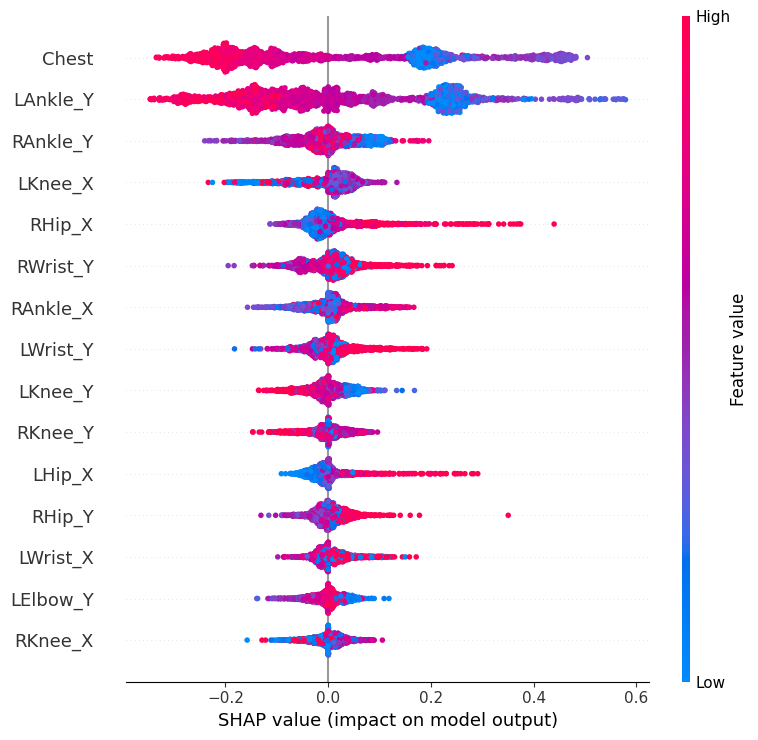

In [42]:
shap_values_2d = np.squeeze(shap_values)


# SHAP 값 시각화
shap.summary_plot(shap_values_2d, X_single_test, feature_names=feature_columns, max_display=15)
plt.show()

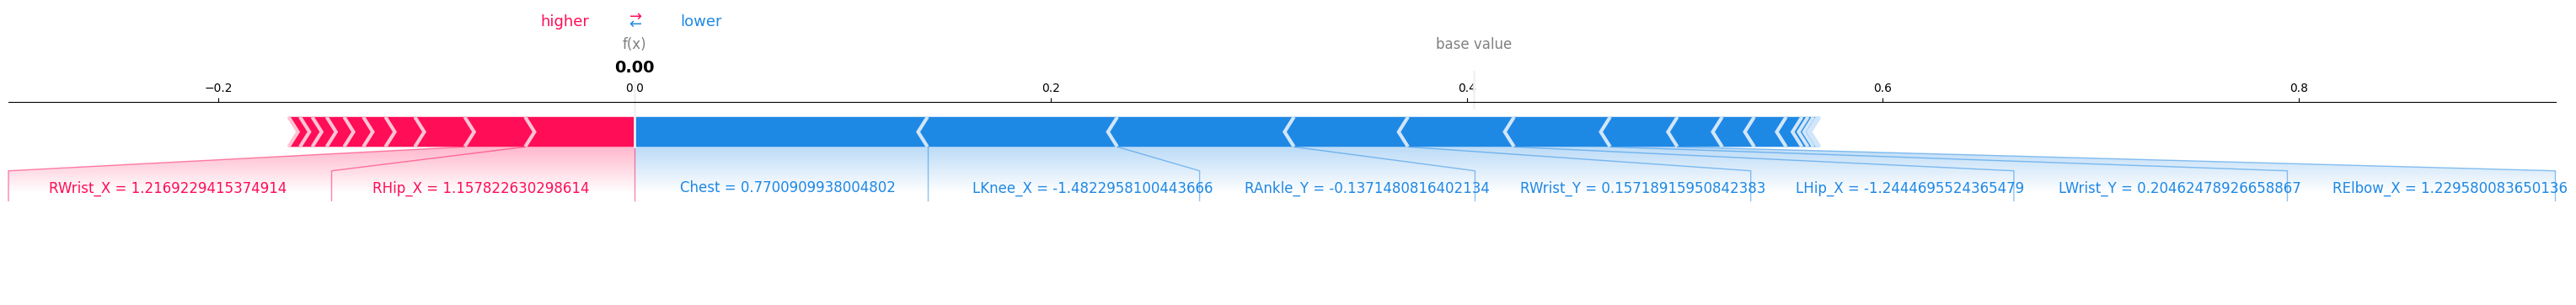

In [36]:
# Force plot 시각화 (테스트 데이터 첫 번째 샘플)
shap.force_plot(explainer.expected_value, shap_values_2d[3], X_single_test[3], matplotlib=True, figsize=(39, 3), feature_names=feature_columns)
plt.show()